# FIX


In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [ ]:
data = pd.read_csv('/content/KAIAccess_final_ver3-numberremoved-nulltextremoved-fixed.csv')
data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace = True)
print(data)
data.review_text=data.review_text.astype(str)
data_predict = pd.read_csv('predict.csv')
data_predict1 = pd.read_csv('predict1.csv')
data_predict2 = pd.read_csv('predict2.csv')
data_predict2

     app_ver_name reviewer_language     device  review_month  star_rating  \
0           4.5.1                id      a6lte             8            5   
1           4.4.7                id    CPH1909             8            5   
2           4.5.1                id   OP4B80L1             8            1   
3           4.5.1                en       F04G             8            5   
4           4.5.1                en       F04G             8            5   
...           ...               ...        ...           ...          ...   
8286        4.4.9                id  j2corelte             6            5   
8287        4.4.9                id   OP4C51L1             6            1   
8288        4.3.3                id    CPH1723             6            5   
8289        4.4.9                id    RMX1941             6            1   
8290        4.4.9                id     m20lte             6            1   

                                            review_text sentiment  \
0     

,Review Text,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title
0,aplikasinya bagus sampai update terakhir. tida...,com.kai.kaiticketing,91.0,4.5.0,id,rolex,2021-07-01T12:59:10Z,1625144350241,2021-07-01T12:59:10Z,1625144350241,5,NaN
1,proses mengubah nomor telepon saya sangat susa...,com.kai.kaiticketing,NaN,NaN,id,merlin,2021-07-01T13:48:03Z,1625147283832,2021-07-01T13:48:03Z,1625147283832,5,NaN
2,aplikasi ini berjalan sangat lambat. saya tida...,com.kai.kaiticketing,90.0,4.4.9,id,RMX1821,2021-07-01T14:19:35Z,1625149175653,2021-07-01T14:19:35Z,1625149175653,3,NaN
3,selalu force close saat akan meproses pembayar...,com.kai.kaiticketing,91.0,4.5.0,id,ugglite,2019-06-07T05:09:19Z,1559884159540,2021-07-01T14:33:58Z,1625150038477,1,NaN
4,aplikasi ini sangat bagus. saya pengguna yang ...,com.kai.kaiticketing,91.0,4.5.0,id,OP4863,2021-07-01T14:35:43Z,1625150143875,2021-07-01T14:35:43Z,1625150143875,1,NaN


In [ ]:
test_portion = 0.2
oov_tok = '<OOV_TOK>'
vocab_size = 100000
embedding_dim = 16
trunc_type = 'post'
padding_type = 'post'
max_length = 150

**Split data**

In [ ]:
train_set = data

text_train = train_set['review_text']
sent_train = train_set['sentiment']
topic_train = train_set['topic']
detail_train = train_set['detail_topic']

**Tokenizing**

In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(text_train)
text_word_index = tokenizer.word_index

sent_tokenizer = Tokenizer()
sent_tokenizer.fit_on_texts(sent_train)
sent_word_index = sent_tokenizer.word_index

topic_tokenizer = Tokenizer()
topic_tokenizer.fit_on_texts(topic_train)
topic_word_index = topic_tokenizer.word_index

detail_tokenizer = Tokenizer()
detail_tokenizer.fit_on_texts(detail_train)
detail_word_index = detail_tokenizer.word_index

print("setences dict:")
print(text_word_index)
print("sentiment dict:")
print(sent_word_index)
print("topic dict:")
print(topic_word_index)
print("detail dict:")
print(detail_word_index)

setences dict:
{'<OOV_TOK>': 1, 'tidak': 2, 'bisa': 3, 'sangat': 4, 'tiket': 5, 'aplikasi': 6, 'dan': 7, 'di': 8, 'kai': 9, 'saya': 10, 'membantu': 11, 'yang': 12, 'mantap': 13, 'kereta': 14, 'untuk': 15, 'ini': 16, 'bagus': 17, 'mudah': 18, 'sudah': 19, 'mau': 20, 'ada': 21, 'access': 22, 'terus': 23, 'lagi': 24, 'tapi': 25, 'lebih': 26, 'pesan': 27, 'nya': 28, 'kenapa': 29, 'ya': 30, 'api': 31, 'kasih': 32, 'terima': 33, 'tolong': 34, 'ke': 35, 'jadi': 36, 'padahal': 37, 'banget': 38, 'aplikasinya': 39, 'sekali': 40, 'kok': 41, 'dalam': 42, 'pembayaran': 43, 'jadwal': 44, 'juga': 45, 'akun': 46, 'dengan': 47, 'selalu': 48, 'harus': 49, 'email': 50, 'login': 51, 'aja': 52, 'memudahkan': 53, 'pemesanan': 54, 'update': 55, 'beli': 56, 'ka': 57, 'udah': 58, 'stasiun': 59, 'daftar': 60, 'good': 61, 'dari': 62, 'baik': 63, 'buat': 64, 'mohon': 65, 'malah': 66, 'mempermudah': 67, 'ok': 68, 'lokal': 69, 'sekarang': 70, 'nomor': 71, 'sama': 72, 'kalau': 73, 'lain': 74, 'ribet': 75, 'hp': 76, 

**SEQ and PAD**

In [ ]:
#==========================TEXT SEQ & PAD==================================
text_train_seq = tokenizer.texts_to_sequences(text_train)
text_train_pad = pad_sequences(text_train_seq, padding=padding_type, truncating=trunc_type, 
                               maxlen=max_length)

#==========================SENT SEQ & PAD==================================
sent_train_seq = np.array(sent_tokenizer.texts_to_sequences(sent_train))
sent_train_pad = pad_sequences(sent_train_seq, padding=padding_type, truncating=trunc_type, maxlen=1)

#==========================TOPIC SEQ & PAD==================================
topic_train_seq = np.array(topic_tokenizer.texts_to_sequences(topic_train))
topic_train_pad = pad_sequences(topic_train_seq, padding=padding_type, truncating=trunc_type, maxlen=1)

#==========================DETAIL SEQ & PAD==================================
detail_train_seq = np.array(detail_tokenizer.texts_to_sequences(detail_train))


**Sentiment**

In [ ]:
sent_train_label_seq = np.array(sent_tokenizer.texts_to_sequences(sent_train))

In [ ]:
ckpt_path = "sent/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path,
                                                 save_weights_only=True,
                                                 verbose=1)
sent_model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(4100, embedding_dim, input_length = max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dense(4, activation = 'softmax')
])

sent_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
                   metrics = ['sparse_categorical_accuracy'])
sent_hist = sent_model.fit(text_train_pad, sent_train_label_seq, 
                         epochs = 40, callbacks= [cp_callback])

Epoch 1/40
258/260 [============================>.] - ETA: 0s - loss: 0.9757 - sparse_categorical_accuracy: 0.6277
Epoch 1: saving model to sent/cp.ckpt
260/260 [==============================] - 5s 5ms/step - loss: 0.9747 - sparse_categorical_accuracy: 0.6280
Epoch 2/40
248/260 [===========================>..] - ETA: 0s - loss: 0.7626 - sparse_categorical_accuracy: 0.6666
Epoch 2: saving model to sent/cp.ckpt
260/260 [==============================] - 1s 4ms/step - loss: 0.7572 - sparse_categorical_accuracy: 0.6701
Epoch 3/40
258/260 [============================>.] - ETA: 0s - loss: 0.5895 - sparse_categorical_accuracy: 0.7872
Epoch 3: saving model to sent/cp.ckpt
260/260 [==============================] - 1s 4ms/step - loss: 0.5897 - sparse_categorical_accuracy: 0.7869
Epoch 4/40
256/260 [============================>.] - ETA: 0s - loss: 0.4679 - sparse_categorical_accuracy: 0.8466
Epoch 4: saving model to sent/cp.ckpt
260/260 [==============================] - 1s 4ms/step - loss: 0

In [ ]:
sent_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 150, 16)           65600     
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 32)                544       
                                                                 
 dense_7 (Dense)             (None, 4)                 132       
                                                                 
Total params: 66,276
Trainable params: 66,276
Non-trainable params: 0
_________________________________________________________________


<Figure size 432x288 with 0 Axes>

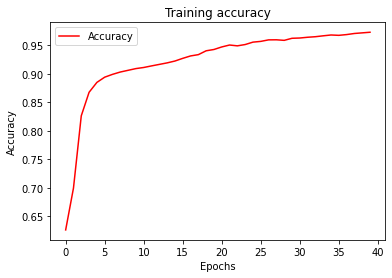

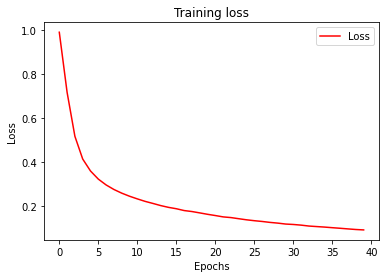

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=sent_hist.history['sparse_categorical_accuracy']
loss=sent_hist.history['loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r')
plt.title('Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy"])

plt.figure()

plt.plot(epochs, loss, 'r')

plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

In [ ]:
scores = sent_model.evaluate(text_train_pad, sent_train_seq, verbose=0)
print("%s: %.2f%%" % (sent_model.metrics_names[1], scores[1]*100))

sparse_categorical_accuracy: 97.37%


In [ ]:
sent_test_text = np.array(data_predict['Review Text'])
sent_test_input = np.array(pad_sequences(tokenizer.texts_to_sequences(sent_test_text), padding=padding_type,
                                    maxlen=max_length, truncating=trunc_type))
sprediction = sent_model.predict(sent_test_input)
print(sprediction)
print(sent_tokenizer.word_index)
slist_result = []
for row in range(len(sprediction)):
  sresult = sprediction[row].tolist().index(np.max(sprediction[row]))
  slist_result.append(sresult)
  print("prdiction- " + str(row) + " : " + str(sresult) + " with " + str(100*max(sprediction[row].tolist()*100)) + " percentage")
spre_result=[]
for s in slist_result:
  spre_result.append(sent_tokenizer.index_word[s])

data_predict['predict_sentiment'] = np.array(spre_result)
data_predict

[[2.5634070e-10 9.9999332e-01 2.4788768e-11 6.6620732e-06]
 [3.2045648e-06 9.0442550e-01 1.6926599e-03 9.3878582e-02]
 [4.4531707e-09 3.9899692e-09 9.9706799e-01 2.9320340e-03]
 [8.8773976e-17 1.5598560e-18 9.9999964e-01 3.7925378e-07]
 [1.1743323e-19 1.2644419e-22 1.0000000e+00 1.5290960e-08]]
{'positif': 1, 'negatif': 2, 'netral': 3}
prdiction- 0 : 1 with 99.99933242797852 percentage
prdiction- 1 : 1 with 90.44255018234253 percentage
prdiction- 2 : 2 with 99.70679879188538 percentage
prdiction- 3 : 2 with 99.99996423721313 percentage
prdiction- 4 : 2 with 100.0 percentage


,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title,Review Text,Developer Reply Date and Time,Developer Reply Millis Since Epoch,Developer Reply Text,Review Link,predict_sentiment
0,com.kai.kaiticketing,91.0,4.5.0,id,rolex,2021-07-01T12:59:10Z,1625144350241,2021-07-01T12:59:10Z,1625144350241,5,NaN,mantap dahh sangat memuaskan dan memudahkan,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,positif
1,com.kai.kaiticketing,NaN,NaN,id,merlin,2021-07-01T13:48:03Z,1625147283832,2021-07-01T13:48:03Z,1625147283832,5,NaN,Sukses,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,positif
2,com.kai.kaiticketing,90.0,4.4.9,id,RMX1821,2021-07-01T14:19:35Z,1625149175653,2021-07-01T14:19:35Z,1625149175653,3,NaN,"Membantu sekali kalo mau ke SBY, cuma yang jad...",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif
3,com.kai.kaiticketing,91.0,4.5.0,id,ugglite,2019-06-07T05:09:19Z,1559884159540,2021-07-01T14:33:58Z,1625150038477,1,NaN,Kenapa saya login dengan email dan kata sandi ...,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif
4,com.kai.kaiticketing,91.0,4.5.0,id,OP4863,2021-07-01T14:35:43Z,1625150143875,2021-07-01T14:35:43Z,1625150143875,1,NaN,"Kenapa saya pas udah pilih kursi , aplikasi ma...",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif


In [ ]:
sent_test_text = np.array(data_predict1['Review Text'])
sent_test_input = np.array(pad_sequences(tokenizer.texts_to_sequences(sent_test_text), padding=padding_type,
                                    maxlen=max_length, truncating=trunc_type))
sprediction = sent_model.predict(sent_test_input)
print(sprediction)
print(sent_tokenizer.word_index)
slist_result = []
for row in range(len(sprediction)):
  sresult = sprediction[row].tolist().index(np.max(sprediction[row]))
  slist_result.append(sresult)
  print("prdiction- " + str(row) + " : " + str(sresult) + " with " + str(100*max(sprediction[row].tolist()*100)) + " percentage")
spre_result=[]
for s in slist_result:
  spre_result.append(sent_tokenizer.index_word[s])

data_predict1['predict_sentiment'] = np.array(spre_result)
data_predict1

[[1.9976402e-07 3.0817671e-04 8.7559187e-01 1.2409975e-01]
 [3.0541191e-08 9.9984181e-01 1.6892654e-08 1.5817673e-04]
 [8.3599794e-11 1.1708032e-09 9.9912947e-01 8.7050471e-04]
 [1.3505428e-12 1.8057719e-12 9.9993360e-01 6.6440414e-05]
 [4.0967585e-10 1.0950397e-08 9.9784040e-01 2.1595880e-03]]
{'positif': 1, 'negatif': 2, 'netral': 3}
prdiction- 0 : 2 with 87.55918741226196 percentage
prdiction- 1 : 1 with 99.98418092727661 percentage
prdiction- 2 : 2 with 99.91294741630554 percentage
prdiction- 3 : 2 with 99.99336004257202 percentage
prdiction- 4 : 2 with 99.7840404510498 percentage


,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title,Review Text,Developer Reply Date and Time,Developer Reply Millis Since Epoch,Developer Reply Text,Review Link,predict_sentiment
0,com.kai.kaiticketing,91.0,4.5.0,id,rolex,2021-07-01T12:59:10Z,1625144350241,2021-07-01T12:59:10Z,1625144350241,5,NaN,jelek banget dah aplikasinya,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif
1,com.kai.kaiticketing,NaN,NaN,id,merlin,2021-07-01T13:48:03Z,1625147283832,2021-07-01T13:48:03Z,1625147283832,5,NaN,"bagus sih, memudahkan aku yang suka naik kereta",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,positif
2,com.kai.kaiticketing,90.0,4.4.9,id,RMX1821,2021-07-01T14:19:35Z,1625149175653,2021-07-01T14:19:35Z,1625149175653,3,NaN,"gabisa pesan, tiap pilih kursi pasti tiba tiba...",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif
3,com.kai.kaiticketing,91.0,4.5.0,id,ugglite,2019-06-07T05:09:19Z,1559884159540,2021-07-01T14:33:58Z,1625150038477,1,NaN,"padahal email sama password udah bener, tapi m...",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif
4,com.kai.kaiticketing,91.0,4.5.0,id,OP4863,2021-07-01T14:35:43Z,1625150143875,2021-07-01T14:35:43Z,1625150143875,1,NaN,kenapa tiap mau klik tombol bayar gabisa giman...,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif


In [ ]:
sent_test_text = np.array(data_predict2['Review Text'])
sent_test_input = np.array(pad_sequences(tokenizer.texts_to_sequences(sent_test_text), padding=padding_type,
                                    maxlen=max_length, truncating=trunc_type))
sprediction = sent_model.predict(sent_test_input)
print(sprediction)
print(sent_tokenizer.word_index)
slist_result = []
for row in range(len(sprediction)):
  sresult = sprediction[row].tolist().index(np.max(sprediction[row]))
  slist_result.append(sresult)
  print("prdiction- " + str(row) + " : " + str(sresult) + " with " + str(100*max(sprediction[row].tolist()*100)) + " percentage")
spre_result=[]
for s in slist_result:
  spre_result.append(sent_tokenizer.index_word[s])
print(slist_result)
data_predict2['predict_sentiment'] = np.array(spre_result)
data_predict2

[[2.2012925e-09 9.8737543e-09 9.9692070e-01 3.0792651e-03]
 [2.7448823e-09 1.0408042e-07 9.9369907e-01 6.3007893e-03]
 [1.6825680e-07 1.4238425e-04 9.0357298e-01 9.6284457e-02]
 [9.6900569e-12 4.4017578e-11 9.9974412e-01 2.5589322e-04]
 [5.7570281e-07 5.2899210e-04 8.1977510e-01 1.7969529e-01]]
{'positif': 1, 'negatif': 2, 'netral': 3}
prdiction- 0 : 2 with 99.69207048416138 percentage
prdiction- 1 : 2 with 99.36990737915039 percentage
prdiction- 2 : 2 with 90.35729765892029 percentage
prdiction- 3 : 2 with 99.97441172599792 percentage
prdiction- 4 : 2 with 81.97751045227051 percentage
[2, 2, 2, 2, 2]


,Review Text,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title,predict_sentiment
0,aplikasinya bagus sampai update terakhir. tida...,com.kai.kaiticketing,91.0,4.5.0,id,rolex,2021-07-01T12:59:10Z,1625144350241,2021-07-01T12:59:10Z,1625144350241,5,NaN,negatif
1,proses mengubah nomor telepon saya sangat susa...,com.kai.kaiticketing,NaN,NaN,id,merlin,2021-07-01T13:48:03Z,1625147283832,2021-07-01T13:48:03Z,1625147283832,5,NaN,negatif
2,aplikasi ini berjalan sangat lambat. saya tida...,com.kai.kaiticketing,90.0,4.4.9,id,RMX1821,2021-07-01T14:19:35Z,1625149175653,2021-07-01T14:19:35Z,1625149175653,3,NaN,negatif
3,selalu force close saat akan meproses pembayar...,com.kai.kaiticketing,91.0,4.5.0,id,ugglite,2019-06-07T05:09:19Z,1559884159540,2021-07-01T14:33:58Z,1625150038477,1,NaN,negatif
4,aplikasi ini sangat bagus. saya pengguna yang ...,com.kai.kaiticketing,91.0,4.5.0,id,OP4863,2021-07-01T14:35:43Z,1625150143875,2021-07-01T14:35:43Z,1625150143875,1,NaN,negatif


In [ ]:
sent_model.save('nonull_model_sent-nonumber.h5')

**TOPIC**

In [ ]:
topic_train_input = np.concatenate([text_train_pad, sent_train_pad], axis=1)

In [ ]:
ckpt_path = "topic/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path,
                                                 save_weights_only=True,
                                                 verbose=1)
topic_model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(4100, embedding_dim, input_length = max_length+1),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(8, activation = 'softmax')
])

topic_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
                     metrics = ['sparse_categorical_accuracy'])
topic_hist = topic_model.fit(topic_train_input, topic_train_seq, epochs = 60)

Epoch 1/60
260/260 [==============================] - 7s 12ms/step - loss: 0.8405 - sparse_categorical_accuracy: 0.7576
Epoch 2/60
260/260 [==============================] - 3s 12ms/step - loss: 0.4844 - sparse_categorical_accuracy: 0.8295
Epoch 3/60
260/260 [==============================] - 3s 12ms/step - loss: 0.3660 - sparse_categorical_accuracy: 0.8658
Epoch 4/60
260/260 [==============================] - 3s 12ms/step - loss: 0.2673 - sparse_categorical_accuracy: 0.9103
Epoch 5/60
260/260 [==============================] - 3s 12ms/step - loss: 0.1877 - sparse_categorical_accuracy: 0.9449
Epoch 6/60
260/260 [==============================] - 3s 12ms/step - loss: 0.1371 - sparse_categorical_accuracy: 0.9598
Epoch 7/60
260/260 [==============================] - 3s 12ms/step - loss: 0.0967 - sparse_categorical_accuracy: 0.9706
Epoch 8/60
260/260 [==============================] - 5s 18ms/step - loss: 0.0716 - sparse_categorical_accuracy: 0.9779
Epoch 9/60
260/260 [====================

In [ ]:
topic_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 151, 16)           65600     
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 8)                 264       
                                                                 
Total params: 80,488
Trainable params: 80,488
Non-trainable params: 0
_________________________________________________________________


In [ ]:
scores = topic_model.evaluate(topic_train_input, topic_train_seq, verbose=0)
print("%s: %.2f%%" % (topic_model.metrics_names[1], scores[1]*100))

sparse_categorical_accuracy: 99.98%


<Figure size 432x288 with 0 Axes>

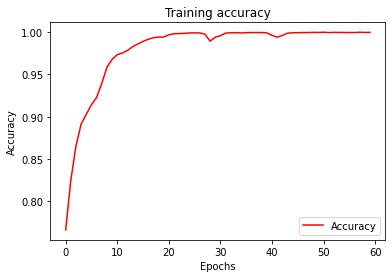

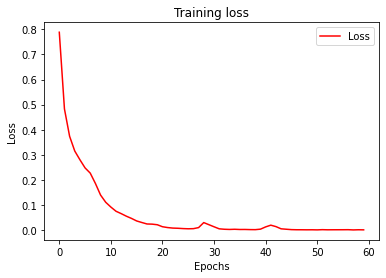

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=topic_hist.history['sparse_categorical_accuracy']
loss=topic_hist.history['loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r')
plt.title('Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy"])

plt.figure()

plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()


In [ ]:
testing_text = np.array(data_predict['Review Text'])
testing_text = pad_sequences(tokenizer.texts_to_sequences(testing_text), padding=padding_type, truncating=trunc_type, maxlen=max_length)
testing_sent = np.array(data_predict['predict_sentiment'])
testing_sent = pad_sequences(sent_tokenizer.texts_to_sequences(testing_sent), padding=padding_type, truncating=trunc_type, maxlen=1)
testing_input = np.concatenate([testing_text, testing_sent], axis=1)
predicting = topic_model.predict(np.array(testing_input))
listresult = []
print(predicting)
print(topic_tokenizer.word_index)
for row in range(len(predicting)):
  result = predicting[row].tolist().index(np.max(predicting[row]))
  listresult.append(result)
  print("prediction- " + str(row) + " : " + str(result) + " with " + str(100*max(predicting[row].tolist()*100)) + " percentage")

preresult = []

for aa in listresult:
  preresult.append(topic_tokenizer.index_word[aa])

data_predict['predict_topic'] = np.array(preresult)
data_predict

[[1.95460018e-14 1.00000000e+00 1.10459194e-11 1.41056835e-18
  1.05453007e-18 1.30006805e-08 4.32338690e-22 2.82848900e-09]
 [2.18886888e-11 9.99992847e-01 2.09407647e-09 2.49397196e-14
  5.91326882e-16 6.06627782e-06 5.39467740e-17 1.03311129e-06]
 [3.16004778e-10 1.63133955e-05 2.53884937e-05 1.11258489e-13
  6.38644519e-13 4.28090789e-05 2.13594933e-10 9.99915481e-01]
 [2.59552139e-14 1.71607019e-06 4.30950775e-10 9.99998093e-01
  3.22271073e-12 2.56350976e-08 1.54879373e-07 2.56396179e-14]
 [4.77335023e-13 7.93185038e-08 9.99986649e-01 1.14018798e-15
  9.78329808e-06 5.00289588e-13 1.34018263e-09 3.39245753e-06]]
{'feedback': 1, 'pemesanan': 2, 'registrasilogin': 3, 'pembayaran': 4, 'error': 5, 'pengaturan': 6, 'pembatalan': 7}
prediction- 0 : 1 with 100.0 percentage
prediction- 1 : 1 with 99.9992847442627 percentage
prediction- 2 : 7 with 99.99154806137085 percentage
prediction- 3 : 3 with 99.99980926513672 percentage
prediction- 4 : 2 with 99.99866485595703 percentage


,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title,Review Text,Developer Reply Date and Time,Developer Reply Millis Since Epoch,Developer Reply Text,Review Link,predict_sentiment,predict_topic
0,com.kai.kaiticketing,91.0,4.5.0,id,rolex,2021-07-01T12:59:10Z,1625144350241,2021-07-01T12:59:10Z,1625144350241,5,NaN,mantap dahh sangat memuaskan dan memudahkan,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,positif,feedback
1,com.kai.kaiticketing,NaN,NaN,id,merlin,2021-07-01T13:48:03Z,1625147283832,2021-07-01T13:48:03Z,1625147283832,5,NaN,Sukses,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,positif,feedback
2,com.kai.kaiticketing,90.0,4.4.9,id,RMX1821,2021-07-01T14:19:35Z,1625149175653,2021-07-01T14:19:35Z,1625149175653,3,NaN,"Membantu sekali kalo mau ke SBY, cuma yang jad...",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif,pembatalan
3,com.kai.kaiticketing,91.0,4.5.0,id,ugglite,2019-06-07T05:09:19Z,1559884159540,2021-07-01T14:33:58Z,1625150038477,1,NaN,Kenapa saya login dengan email dan kata sandi ...,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif,registrasilogin
4,com.kai.kaiticketing,91.0,4.5.0,id,OP4863,2021-07-01T14:35:43Z,1625150143875,2021-07-01T14:35:43Z,1625150143875,1,NaN,"Kenapa saya pas udah pilih kursi , aplikasi ma...",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif,pemesanan


In [ ]:
testing_text = np.array(data_predict1['Review Text'])
testing_text = pad_sequences(tokenizer.texts_to_sequences(testing_text), padding=padding_type, truncating=trunc_type, maxlen=max_length)
testing_sent = np.array(data_predict1['predict_sentiment'])
testing_sent = pad_sequences(sent_tokenizer.texts_to_sequences(testing_sent), padding=padding_type, truncating=trunc_type, maxlen=1)
testing_input = np.concatenate([testing_text, testing_sent], axis=1)
predicting = topic_model.predict(np.array(testing_input))
listresult = []
print(predicting)
print(topic_tokenizer.word_index)
for row in range(len(predicting)):
  result = predicting[row].tolist().index(np.max(predicting[row]))
  listresult.append(result)
  print("prediction- " + str(row) + " : " + str(result) + " with " + str(100*max(predicting[row].tolist()*100)) + " percentage")

preresult = []

for aa in listresult:
  preresult.append(topic_tokenizer.index_word[aa])

data_predict1['predict_topic'] = np.array(preresult)
data_predict1

[[3.20353965e-12 9.99997854e-01 3.92338662e-10 7.15599607e-15
  5.08530682e-16 2.09883638e-06 9.25887248e-18 6.21179481e-08]
 [1.17277797e-13 1.00000000e+00 7.04500139e-11 7.89210624e-18
  4.65033827e-18 1.84410407e-08 5.54890688e-21 1.65269416e-08]
 [1.60070579e-13 4.04473582e-07 9.99996066e-01 9.68153629e-17
  2.26217730e-06 2.88666762e-14 2.32033368e-11 1.26681289e-06]
 [3.14420426e-14 7.39487461e-07 6.44623688e-10 9.99999166e-01
  2.32967465e-12 3.24724105e-08 1.07730884e-07 4.09078492e-14]
 [1.37871499e-13 3.59752698e-06 1.20124918e-04 5.97652761e-10
  9.99856114e-01 2.25855792e-12 2.01680523e-05 1.80453297e-09]]
{'feedback': 1, 'pemesanan': 2, 'registrasilogin': 3, 'pembayaran': 4, 'error': 5, 'pengaturan': 6, 'pembatalan': 7}
prediction- 0 : 1 with 99.99978542327881 percentage
prediction- 1 : 1 with 100.0 percentage
prediction- 2 : 2 with 99.99960660934448 percentage
prediction- 3 : 3 with 99.99991655349731 percentage
prediction- 4 : 4 with 99.98561143875122 percentage


,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title,Review Text,Developer Reply Date and Time,Developer Reply Millis Since Epoch,Developer Reply Text,Review Link,predict_sentiment,predict_topic
0,com.kai.kaiticketing,91.0,4.5.0,id,rolex,2021-07-01T12:59:10Z,1625144350241,2021-07-01T12:59:10Z,1625144350241,5,NaN,jelek banget dah aplikasinya,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif,feedback
1,com.kai.kaiticketing,NaN,NaN,id,merlin,2021-07-01T13:48:03Z,1625147283832,2021-07-01T13:48:03Z,1625147283832,5,NaN,"bagus sih, memudahkan aku yang suka naik kereta",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,positif,feedback
2,com.kai.kaiticketing,90.0,4.4.9,id,RMX1821,2021-07-01T14:19:35Z,1625149175653,2021-07-01T14:19:35Z,1625149175653,3,NaN,"gabisa pesan, tiap pilih kursi pasti tiba tiba...",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif,pemesanan
3,com.kai.kaiticketing,91.0,4.5.0,id,ugglite,2019-06-07T05:09:19Z,1559884159540,2021-07-01T14:33:58Z,1625150038477,1,NaN,"padahal email sama password udah bener, tapi m...",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif,registrasilogin
4,com.kai.kaiticketing,91.0,4.5.0,id,OP4863,2021-07-01T14:35:43Z,1625150143875,2021-07-01T14:35:43Z,1625150143875,1,NaN,kenapa tiap mau klik tombol bayar gabisa giman...,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif,pembayaran


In [ ]:
testing_text = np.array(data_predict2['Review Text'])
testing_text = pad_sequences(tokenizer.texts_to_sequences(testing_text), padding=padding_type, truncating=trunc_type, maxlen=max_length)
testing_sent = np.array(data_predict2['predict_sentiment'])
testing_sent = pad_sequences(sent_tokenizer.texts_to_sequences(testing_sent), padding=padding_type, truncating=trunc_type, maxlen=1)
testing_input = np.concatenate([testing_text, testing_sent], axis=1)
predicting = topic_model.predict(np.array(testing_input))
listresult = []
print(predicting)
print(topic_tokenizer.word_index)
for row in range(len(predicting)):
  result = predicting[row].tolist().index(np.max(predicting[row]))
  listresult.append(result)
  print("prediction- " + str(row) + " : " + str(result) + " with " + str(100*max(predicting[row].tolist()*100)) + " percentage")

preresult = []

for aa in listresult:
  preresult.append(topic_tokenizer.index_word[aa])

data_predict2['predict_topic'] = np.array(preresult)
data_predict2

[[1.23818168e-07 2.14527667e-01 7.54683793e-01 5.63261868e-11
  9.87724434e-07 2.46736090e-06 4.73276422e-08 3.07849161e-02]
 [3.55403762e-10 2.43118666e-05 1.22992415e-05 9.35534775e-01
  1.16757508e-06 1.49138577e-04 6.42783269e-02 3.02688541e-08]
 [8.94015385e-13 1.82548717e-07 9.99980927e-01 1.79042796e-15
  1.58824041e-05 2.96450202e-13 8.93738805e-10 2.96142980e-06]
 [7.92472533e-13 1.12663372e-06 6.09764457e-02 1.64179846e-12
  9.39017415e-01 7.67642514e-13 4.82413043e-06 2.55142425e-07]
 [8.86518116e-12 9.99987602e-01 4.70543049e-10 2.66691474e-14
  6.08068383e-16 1.20843206e-05 3.74784253e-17 3.21421084e-07]]
{'feedback': 1, 'pemesanan': 2, 'registrasilogin': 3, 'pembayaran': 4, 'error': 5, 'pengaturan': 6, 'pembatalan': 7}
prediction- 0 : 2 with 75.4683792591095 percentage
prediction- 1 : 3 with 93.55347752571106 percentage
prediction- 2 : 2 with 99.99809265136719 percentage
prediction- 3 : 4 with 93.90174150466919 percentage
prediction- 4 : 1 with 99.99876022338867 percentag

,Review Text,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title,predict_sentiment,predict_topic
0,aplikasinya bagus sampai update terakhir. tida...,com.kai.kaiticketing,91.0,4.5.0,id,rolex,2021-07-01T12:59:10Z,1625144350241,2021-07-01T12:59:10Z,1625144350241,5,NaN,negatif,pemesanan
1,proses mengubah nomor telepon saya sangat susa...,com.kai.kaiticketing,NaN,NaN,id,merlin,2021-07-01T13:48:03Z,1625147283832,2021-07-01T13:48:03Z,1625147283832,5,NaN,negatif,registrasilogin
2,aplikasi ini berjalan sangat lambat. saya tida...,com.kai.kaiticketing,90.0,4.4.9,id,RMX1821,2021-07-01T14:19:35Z,1625149175653,2021-07-01T14:19:35Z,1625149175653,3,NaN,negatif,pemesanan
3,selalu force close saat akan meproses pembayar...,com.kai.kaiticketing,91.0,4.5.0,id,ugglite,2019-06-07T05:09:19Z,1559884159540,2021-07-01T14:33:58Z,1625150038477,1,NaN,negatif,pembayaran
4,aplikasi ini sangat bagus. saya pengguna yang ...,com.kai.kaiticketing,91.0,4.5.0,id,OP4863,2021-07-01T14:35:43Z,1625150143875,2021-07-01T14:35:43Z,1625150143875,1,NaN,negatif,feedback


In [ ]:
topic_model.save('nonull_model_topic-nonumber.h5')

**Detail**

In [ ]:
detail_train_input = np.concatenate([text_train_pad, sent_train_pad, topic_train_pad], axis=1)

In [ ]:
ckpt_path = "detail/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path,
                                                 save_weights_only=True,
                                                 verbose=1)
detail_model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(4100, embedding_dim, input_length = max_length+2),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(22, activation = 'softmax')
])

detail_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
                     metrics = ['sparse_categorical_accuracy'])
detail_hist = detail_model.fit(detail_train_input, detail_train_seq, epochs = 60, 
                          callbacks = [cp_callback])

Epoch 1/60
259/260 [============================>.] - ETA: 0s - loss: 1.3796 - sparse_categorical_accuracy: 0.6453
Epoch 1: saving model to detail/cp.ckpt
260/260 [==============================] - 6s 13ms/step - loss: 1.3794 - sparse_categorical_accuracy: 0.6453
Epoch 2/60
260/260 [==============================] - ETA: 0s - loss: 0.7097 - sparse_categorical_accuracy: 0.7799
Epoch 2: saving model to detail/cp.ckpt
260/260 [==============================] - 3s 12ms/step - loss: 0.7097 - sparse_categorical_accuracy: 0.7799
Epoch 3/60
258/260 [============================>.] - ETA: 0s - loss: 0.5202 - sparse_categorical_accuracy: 0.8358
Epoch 3: saving model to detail/cp.ckpt
260/260 [==============================] - 3s 12ms/step - loss: 0.5187 - sparse_categorical_accuracy: 0.8363
Epoch 4/60
260/260 [==============================] - ETA: 0s - loss: 0.3489 - sparse_categorical_accuracy: 0.8936
Epoch 4: saving model to detail/cp.ckpt
260/260 [==============================] - 3s 12ms/st

In [ ]:
detail_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 152, 16)           65600     
                                                                 
 bidirectional_7 (Bidirectio  (None, 128)              41472     
 nal)                                                            
                                                                 
 dense_14 (Dense)            (None, 32)                4128      
                                                                 
 dense_15 (Dense)            (None, 22)                726       
                                                                 
Total params: 111,926
Trainable params: 111,926
Non-trainable params: 0
_________________________________________________________________


In [ ]:
scores = detail_model.evaluate(detail_train_input, detail_train_seq, verbose=0)
print("%s: %.2f%%" % (detail_model.metrics_names[1], scores[1]*100))

sparse_categorical_accuracy: 99.84%


<Figure size 432x288 with 0 Axes>

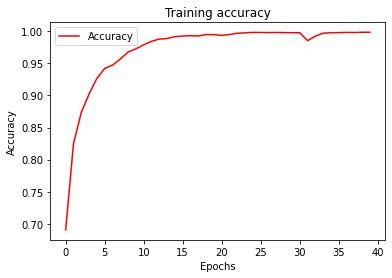

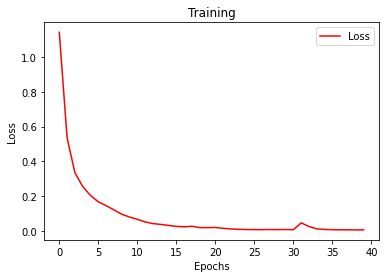

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=detail_hist.history['sparse_categorical_accuracy']
loss=detail_hist.history['loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r')
plt.title('Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy"])

plt.figure()

plt.plot(epochs, loss, 'r')
plt.title('Training')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

In [ ]:
testing_text = np.array(data_predict['Review Text'])
testing_text = pad_sequences(tokenizer.texts_to_sequences(testing_text), padding=padding_type, truncating=trunc_type, maxlen=max_length)
testing_sent = np.array(data_predict['predict_sentiment'])
testing_sent = pad_sequences(sent_tokenizer.texts_to_sequences(testing_sent), padding=padding_type, truncating=trunc_type, maxlen=1)
testing_topic = np.array(data_predict['predict_topic'])
testing_topic = pad_sequences(topic_tokenizer.texts_to_sequences(testing_topic), padding=padding_type, truncating=trunc_type, maxlen=1)
testing_input = np.concatenate([testing_text, testing_sent, testing_topic], axis=1)
predicting = detail_model.predict(np.array(testing_input))
listresult = []
for row in range(len(predicting)):
  result = predicting[row].tolist().index(np.max(predicting[row]))
  listresult.append(result)
  print("prediction- " + str(row) + " : " + str(result) + " with " + str(100*max(predicting[row].tolist()*100)) + " percentage")


preresult = []

for aa in listresult:
  preresult.append(detail_tokenizer.index_word[aa])

data_predict['detail_topic_prediction'] = np.array(preresult)
data_predict

prediction- 0 : 1 with 99.99985694885254 percentage
prediction- 1 : 2 with 99.10287857055664 percentage
prediction- 2 : 13 with 95.73410153388977 percentage
prediction- 3 : 3 with 99.99589920043945 percentage
prediction- 4 : 4 with 99.99203681945801 percentage


,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title,Review Text,Developer Reply Date and Time,Developer Reply Millis Since Epoch,Developer Reply Text,Review Link,predict_sentiment,predict_topic,detail_topic_prediction
0,com.kai.kaiticketing,91.0,4.5.0,id,rolex,2021-07-01T12:59:10Z,1625144350241,2021-07-01T12:59:10Z,1625144350241,5,NaN,mantap dahh sangat memuaskan dan memudahkan,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,positif,feedback,baik
1,com.kai.kaiticketing,NaN,NaN,id,merlin,2021-07-01T13:48:03Z,1625147283832,2021-07-01T13:48:03Z,1625147283832,5,NaN,Sukses,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,positif,feedback,lain
2,com.kai.kaiticketing,90.0,4.4.9,id,RMX1821,2021-07-01T14:19:35Z,1625149175653,2021-07-01T14:19:35Z,1625149175653,3,NaN,"Membantu sekali kalo mau ke SBY, cuma yang jad...",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif,pembatalan,errorpembatalan
3,com.kai.kaiticketing,91.0,4.5.0,id,ugglite,2019-06-07T05:09:19Z,1559884159540,2021-07-01T14:33:58Z,1625150038477,1,NaN,Kenapa saya login dengan email dan kata sandi ...,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif,registrasilogin,login
4,com.kai.kaiticketing,91.0,4.5.0,id,OP4863,2021-07-01T14:35:43Z,1625150143875,2021-07-01T14:35:43Z,1625150143875,1,NaN,"Kenapa saya pas udah pilih kursi , aplikasi ma...",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif,pemesanan,errorpemesanan


In [ ]:
testing_text = np.array(data_predict1['Review Text'])
testing_text = pad_sequences(tokenizer.texts_to_sequences(testing_text), padding=padding_type, truncating=trunc_type, maxlen=max_length)
testing_sent = np.array(data_predict1['predict_sentiment'])
testing_sent = pad_sequences(sent_tokenizer.texts_to_sequences(testing_sent), padding=padding_type, truncating=trunc_type, maxlen=1)
testing_topic = np.array(data_predict1['predict_topic'])
testing_topic = pad_sequences(topic_tokenizer.texts_to_sequences(testing_topic), padding=padding_type, truncating=trunc_type, maxlen=1)
testing_input = np.concatenate([testing_text, testing_sent, testing_topic], axis=1)
predicting = detail_model.predict(np.array(testing_input))
listresult = []
for row in range(len(predicting)):
  result = predicting[row].tolist().index(np.max(predicting[row]))
  listresult.append(result)
  print("prediction- " + str(row) + " : " + str(result) + " with " + str(100*max(predicting[row].tolist()*100)) + " percentage")


preresult = []

for aa in listresult:
  preresult.append(detail_tokenizer.index_word[aa])

data_predict1['detail_topic_prediction'] = np.array(preresult)
data_predict1

prediction- 0 : 2 with 99.99371767044067 percentage
prediction- 1 : 1 with 99.99991655349731 percentage
prediction- 2 : 4 with 99.95558857917786 percentage
prediction- 3 : 3 with 99.99901056289673 percentage
prediction- 4 : 9 with 99.99496936798096 percentage


,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title,Review Text,Developer Reply Date and Time,Developer Reply Millis Since Epoch,Developer Reply Text,Review Link,predict_sentiment,predict_topic,detail_topic_prediction
0,com.kai.kaiticketing,91.0,4.5.0,id,rolex,2021-07-01T12:59:10Z,1625144350241,2021-07-01T12:59:10Z,1625144350241,5,NaN,jelek banget dah aplikasinya,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif,feedback,lain
1,com.kai.kaiticketing,NaN,NaN,id,merlin,2021-07-01T13:48:03Z,1625147283832,2021-07-01T13:48:03Z,1625147283832,5,NaN,"bagus sih, memudahkan aku yang suka naik kereta",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,positif,feedback,baik
2,com.kai.kaiticketing,90.0,4.4.9,id,RMX1821,2021-07-01T14:19:35Z,1625149175653,2021-07-01T14:19:35Z,1625149175653,3,NaN,"gabisa pesan, tiap pilih kursi pasti tiba tiba...",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif,pemesanan,errorpemesanan
3,com.kai.kaiticketing,91.0,4.5.0,id,ugglite,2019-06-07T05:09:19Z,1559884159540,2021-07-01T14:33:58Z,1625150038477,1,NaN,"padahal email sama password udah bener, tapi m...",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif,registrasilogin,login
4,com.kai.kaiticketing,91.0,4.5.0,id,OP4863,2021-07-01T14:35:43Z,1625150143875,2021-07-01T14:35:43Z,1625150143875,1,NaN,kenapa tiap mau klik tombol bayar gabisa giman...,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif,pembayaran,errorpembayaran


In [ ]:
testing_text = np.array(data_predict2['Review Text'])
testing_text = pad_sequences(tokenizer.texts_to_sequences(testing_text), padding=padding_type, truncating=trunc_type, maxlen=max_length)
testing_sent = np.array(data_predict2['predict_sentiment'])
testing_sent = pad_sequences(sent_tokenizer.texts_to_sequences(testing_sent), padding=padding_type, truncating=trunc_type, maxlen=1)
testing_topic = np.array(data_predict2['predict_topic'])
testing_topic = pad_sequences(topic_tokenizer.texts_to_sequences(testing_topic), padding=padding_type, truncating=trunc_type, maxlen=1)
testing_input = np.concatenate([testing_text, testing_sent, testing_topic], axis=1)
predicting = detail_model.predict(np.array(testing_input))
listresult = []
for row in range(len(predicting)):
  result = predicting[row].tolist().index(np.max(predicting[row]))
  listresult.append(result)
  print("prediction- " + str(row) + " : " + str(result) + " with " + str(100*max(predicting[row].tolist()*100)) + " percentage")


preresult = []

for aa in listresult:
  preresult.append(detail_tokenizer.index_word[aa])

data_predict2['detail_topic_prediction'] = np.array(preresult)
data_predict2

prediction- 0 : 19 with 55.12498617172241 percentage
prediction- 1 : 10 with 99.99817609786987 percentage
prediction- 2 : 18 with 97.82857894897461 percentage
prediction- 3 : 14 with 68.95720362663269 percentage
prediction- 4 : 2 with 99.99691247940063 percentage


,Review Text,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title,predict_sentiment,predict_topic,detail_topic_prediction
0,aplikasinya bagus sampai update terakhir. tida...,com.kai.kaiticketing,91.0,4.5.0,id,rolex,2021-07-01T12:59:10Z,1625144350241,2021-07-01T12:59:10Z,1625144350241,5,NaN,negatif,pemesanan,maxpemesanan
1,proses mengubah nomor telepon saya sangat susa...,com.kai.kaiticketing,NaN,NaN,id,merlin,2021-07-01T13:48:03Z,1625147283832,2021-07-01T13:48:03Z,1625147283832,5,NaN,negatif,pengaturan,editprofil
2,aplikasi ini berjalan sangat lambat. saya tida...,com.kai.kaiticketing,90.0,4.4.9,id,RMX1821,2021-07-01T14:19:35Z,1625149175653,2021-07-01T14:19:35Z,1625149175653,3,NaN,negatif,pemesanan,editpemesanan
3,selalu force close saat akan meproses pembayar...,com.kai.kaiticketing,91.0,4.5.0,id,ugglite,2019-06-07T05:09:19Z,1559884159540,2021-07-01T14:33:58Z,1625150038477,1,NaN,negatif,pembayaran,paymentnotif
4,aplikasi ini sangat bagus. saya pengguna yang ...,com.kai.kaiticketing,91.0,4.5.0,id,OP4863,2021-07-01T14:35:43Z,1625150143875,2021-07-01T14:35:43Z,1625150143875,1,NaN,negatif,feedback,lain


In [ ]:
detail_model.save('nonull_model_detail-nonumber.h5')

In [ ]:
#no nulltext

import pandas as pd
from sklearn import metrics

data = pd.read_csv('data_mentah.csv', delimiter = ';')
data_result = pd.read_csv('data_hasil.csv')

Y_act = [data['sentiment'].to_list(), data['topic'].to_list(), data['detail_topic'].to_list()]
Y_pred = [data_result['Sentiment Prediction'].to_list(), data_result['Topic Prediction'].to_list(), data_result['Detail Prediction'].to_list()]

print(Y_act)
print(Y_pred)
def calc_metrics(label, num):
  print(metrics.classification_report(Y_act[num], Y_pred[num], digits=4))

calc_metrics('sentiment', 0)
calc_metrics('topic', 1)
calc_metrics('detail topic', 2)

[['negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'positif', 'negatif', 'negatif', 'positif', 'positif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'positif', 'negatif', 'negatif', 'negatif', 'positif', 'positif', 'positif', 'netral', 'netral', 'negatif', 'negatif', 'negatif', 'positif', 'negatif', 'negatif', 'negatif', 'negatif', 'positif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'positif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'positif', 'negatif', 'negatif', 'negatif', 'netral', 'positif', 'positif', 'negatif', 'netral', 'negatif', 'netral', 'netral', 'negatif', 'positif', 'positif', 'positif', 'negatif', 'positif', 'netral', 'negatif', 'negatif', 'netral', 'negatif', 'negatif', 'negatif', 'netral', 'netral', 'negatif', 'positif', 'negatif', 'negati

sentiment
topic
detail topic


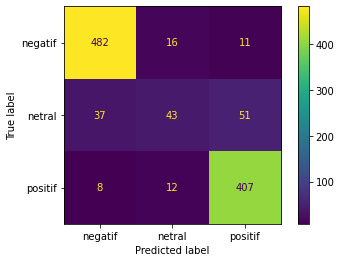

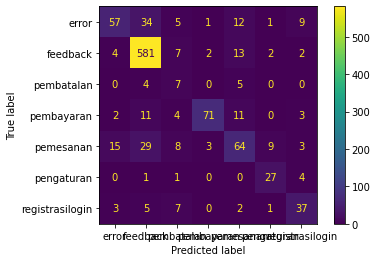

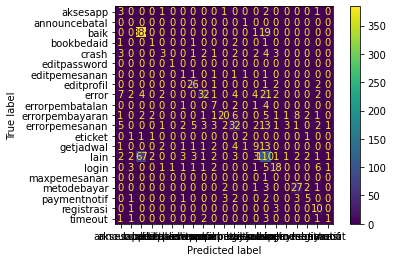

In [ ]:
sent_class = ["negatif", "netral", "positif"]
topic_class = ['error', 'feedback', 'pembatalan', 'pembayaran', 'pemesanan', 'pengaturan', 'registrasilogin']
detail_class = ['aksesapp', 'announcebatal', 'baik', 'bookbedaid', 'crash', 'editpassword', 'editpemesanan', 'editprofil',
                 'error', 'errorpembatalan', 'errorpembayaran', 'errorpemesanan', 'eticket', 'getjadwal', 'lain', 'login',
                 'maxpemesanan', 'metodebayar', 'paymentnotif', 'registrasi', 'timeout']

def calc_conf(label, classs, num):
  cm = metrics.confusion_matrix(Y_act[num], Y_pred[num])
  cmd = metrics.ConfusionMatrixDisplay(cm, display_labels=classs)
  print(label)
  cmd.plot()

calc_conf('sentiment', sent_class, 0)
calc_conf('topic', topic_class, 1)
calc_conf('detail topic', detail_class, 2)

# TRIAL


In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [ ]:
data = pd.read_csv('/content/KAIAccess_final_ver3-numberremoved-nulltextremoved-fixed.csv')
data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace = True)
print(data)
data.review_text=data.review_text.astype(str)
data_predict = pd.read_csv('predict.csv')
data_predict1 = pd.read_csv('predict1.csv')
data_predict2 = pd.read_csv('predict2.csv')
data_predict2

     app_ver_name reviewer_language     device  review_month  star_rating  \
0           4.5.1                id      a6lte             8            5   
1           4.4.7                id    CPH1909             8            5   
2           4.5.1                id   OP4B80L1             8            1   
3           4.5.1                en       F04G             8            5   
4           4.5.1                en       F04G             8            5   
...           ...               ...        ...           ...          ...   
8286        4.4.9                id  j2corelte             6            5   
8287        4.4.9                id   OP4C51L1             6            1   
8288        4.3.3                id    CPH1723             6            5   
8289        4.4.9                id    RMX1941             6            1   
8290        4.4.9                id     m20lte             6            1   

                                            review_text sentiment  \
0     

,Review Text,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title
0,aplikasinya bagus sampai update terakhir. tida...,com.kai.kaiticketing,91.0,4.5.0,id,rolex,2021-07-01T12:59:10Z,1625144350241,2021-07-01T12:59:10Z,1625144350241,5,NaN
1,proses mengubah nomor telepon saya sangat susa...,com.kai.kaiticketing,NaN,NaN,id,merlin,2021-07-01T13:48:03Z,1625147283832,2021-07-01T13:48:03Z,1625147283832,5,NaN
2,aplikasi ini berjalan sangat lambat. saya tida...,com.kai.kaiticketing,90.0,4.4.9,id,RMX1821,2021-07-01T14:19:35Z,1625149175653,2021-07-01T14:19:35Z,1625149175653,3,NaN
3,selalu force close saat akan meproses pembayar...,com.kai.kaiticketing,91.0,4.5.0,id,ugglite,2019-06-07T05:09:19Z,1559884159540,2021-07-01T14:33:58Z,1625150038477,1,NaN
4,aplikasi ini sangat bagus. saya pengguna yang ...,com.kai.kaiticketing,91.0,4.5.0,id,OP4863,2021-07-01T14:35:43Z,1625150143875,2021-07-01T14:35:43Z,1625150143875,1,NaN


In [ ]:
test_portion = 0.2
oov_tok = '<OOV_TOK>'
vocab_size = 100000
embedding_dim = 16
trunc_type = 'post'
padding_type = 'post'
max_length = 150

**Split data**

In [ ]:
train_set = data

text_train = train_set['review_text']
sent_train = train_set['sentiment']
topic_train = train_set['topic']
detail_train = train_set['detail_topic']

**Tokenizing**

In [ ]:
tokenizer = Tokenizer(vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(text_train)
text_word_index = tokenizer.word_index

sent_tokenizer = Tokenizer()
sent_tokenizer.fit_on_texts(sent_train)
sent_word_index = sent_tokenizer.word_index

topic_tokenizer = Tokenizer()
topic_tokenizer.fit_on_texts(topic_train)
topic_word_index = topic_tokenizer.word_index

detail_tokenizer = Tokenizer()
detail_tokenizer.fit_on_texts(detail_train)
detail_word_index = detail_tokenizer.word_index

print("setences dict:")
print(text_word_index)
print("sentiment dict:")
print(sent_word_index)
print("topic dict:")
print(topic_word_index)
print("detail dict:")
print(detail_word_index)

setences dict:
{'<OOV_TOK>': 1, 'tidak': 2, 'bisa': 3, 'sangat': 4, 'tiket': 5, 'aplikasi': 6, 'dan': 7, 'di': 8, 'kai': 9, 'saya': 10, 'membantu': 11, 'yang': 12, 'mantap': 13, 'kereta': 14, 'untuk': 15, 'ini': 16, 'bagus': 17, 'mudah': 18, 'sudah': 19, 'mau': 20, 'ada': 21, 'access': 22, 'terus': 23, 'lagi': 24, 'tapi': 25, 'lebih': 26, 'pesan': 27, 'nya': 28, 'kenapa': 29, 'ya': 30, 'api': 31, 'kasih': 32, 'terima': 33, 'tolong': 34, 'ke': 35, 'jadi': 36, 'padahal': 37, 'banget': 38, 'aplikasinya': 39, 'sekali': 40, 'kok': 41, 'dalam': 42, 'pembayaran': 43, 'jadwal': 44, 'juga': 45, 'akun': 46, 'dengan': 47, 'selalu': 48, 'harus': 49, 'email': 50, 'login': 51, 'aja': 52, 'memudahkan': 53, 'pemesanan': 54, 'update': 55, 'beli': 56, 'ka': 57, 'udah': 58, 'stasiun': 59, 'daftar': 60, 'good': 61, 'dari': 62, 'baik': 63, 'buat': 64, 'mohon': 65, 'malah': 66, 'mempermudah': 67, 'ok': 68, 'lokal': 69, 'sekarang': 70, 'nomor': 71, 'sama': 72, 'kalau': 73, 'lain': 74, 'ribet': 75, 'hp': 76, 

**SEQ and PAD**

In [ ]:
#==========================TEXT SEQ & PAD==================================
text_train_seq = tokenizer.texts_to_sequences(text_train)
text_train_pad = pad_sequences(text_train_seq, padding=padding_type, truncating=trunc_type, 
                               maxlen=max_length)

#==========================SENT SEQ & PAD==================================
sent_train_seq = np.array(sent_tokenizer.texts_to_sequences(sent_train))
sent_train_pad = pad_sequences(sent_train_seq, padding=padding_type, truncating=trunc_type, maxlen=1)

#==========================TOPIC SEQ & PAD==================================
topic_train_seq = np.array(topic_tokenizer.texts_to_sequences(topic_train))
topic_train_pad = pad_sequences(topic_train_seq, padding=padding_type, truncating=trunc_type, maxlen=1)

#==========================DETAIL SEQ & PAD==================================
detail_train_seq = np.array(detail_tokenizer.texts_to_sequences(detail_train))


**Sentiment**

In [ ]:
sent_train_label_seq = np.array(sent_tokenizer.texts_to_sequences(sent_train))

In [ ]:
ckpt_path = "sent/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path,
                                                 save_weights_only=True,
                                                 verbose=1)
sent_model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(4100, embedding_dim, input_length = max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dense(4, activation = 'softmax')
])

sent_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
                   metrics = ['sparse_categorical_accuracy'])
sent_hist = sent_model.fit(text_train_pad, sent_train_label_seq, 
                         epochs = 40, callbacks= [cp_callback])

Epoch 1/40
258/260 [============================>.] - ETA: 0s - loss: 0.9757 - sparse_categorical_accuracy: 0.6277
Epoch 1: saving model to sent/cp.ckpt
260/260 [==============================] - 5s 5ms/step - loss: 0.9747 - sparse_categorical_accuracy: 0.6280
Epoch 2/40
248/260 [===========================>..] - ETA: 0s - loss: 0.7626 - sparse_categorical_accuracy: 0.6666
Epoch 2: saving model to sent/cp.ckpt
260/260 [==============================] - 1s 4ms/step - loss: 0.7572 - sparse_categorical_accuracy: 0.6701
Epoch 3/40
258/260 [============================>.] - ETA: 0s - loss: 0.5895 - sparse_categorical_accuracy: 0.7872
Epoch 3: saving model to sent/cp.ckpt
260/260 [==============================] - 1s 4ms/step - loss: 0.5897 - sparse_categorical_accuracy: 0.7869
Epoch 4/40
256/260 [============================>.] - ETA: 0s - loss: 0.4679 - sparse_categorical_accuracy: 0.8466
Epoch 4: saving model to sent/cp.ckpt
260/260 [==============================] - 1s 4ms/step - loss: 0

In [ ]:
ckpt_path = "sent/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path,
                                                 save_weights_only=True,
                                                 verbose=1)
sent_model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(4100, embedding_dim, input_length = max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dense(4, activation = 'softmax')
])

sent_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
                   metrics = ['sparse_categorical_accuracy'])
sent_hist = sent_model.fit(text_train_pad, sent_train_label_seq, 
                         epochs = 60, callbacks= [cp_callback])

Epoch 1/60
259/260 [============================>.] - ETA: 0s - loss: 0.9737 - sparse_categorical_accuracy: 0.6254
Epoch 1: saving model to sent/cp.ckpt
260/260 [==============================] - 8s 8ms/step - loss: 0.9739 - sparse_categorical_accuracy: 0.6253
Epoch 2/60
256/260 [============================>.] - ETA: 0s - loss: 0.7141 - sparse_categorical_accuracy: 0.7036
Epoch 2: saving model to sent/cp.ckpt
260/260 [==============================] - 2s 6ms/step - loss: 0.7121 - sparse_categorical_accuracy: 0.7053
Epoch 3/60
259/260 [============================>.] - ETA: 0s - loss: 0.5110 - sparse_categorical_accuracy: 0.8316
Epoch 3: saving model to sent/cp.ckpt
260/260 [==============================] - 2s 6ms/step - loss: 0.5109 - sparse_categorical_accuracy: 0.8316
Epoch 4/60
252/260 [============================>.] - ETA: 0s - loss: 0.4108 - sparse_categorical_accuracy: 0.8695
Epoch 4: saving model to sent/cp.ckpt
260/260 [==============================] - 2s 6ms/step - loss: 0

In [ ]:
ckpt_path = "sent/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path,
                                                 save_weights_only=True,
                                                 verbose=1)
sent_model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(4100, embedding_dim, input_length = max_length),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(4, activation = 'softmax')
])

sent_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
                   metrics = ['sparse_categorical_accuracy'])
sent_hist = sent_model.fit(text_train_pad, sent_train_label_seq, 
                         epochs = 40, callbacks= [cp_callback])

Epoch 1/40
258/260 [============================>.] - ETA: 0s - loss: 0.6594 - sparse_categorical_accuracy: 0.7462
Epoch 1: saving model to sent/cp.ckpt
260/260 [==============================] - 7s 16ms/step - loss: 0.6582 - sparse_categorical_accuracy: 0.7467
Epoch 2/40
260/260 [==============================] - ETA: 0s - loss: 0.2483 - sparse_categorical_accuracy: 0.9085
Epoch 2: saving model to sent/cp.ckpt
260/260 [==============================] - 4s 15ms/step - loss: 0.2483 - sparse_categorical_accuracy: 0.9085
Epoch 3/40
260/260 [==============================] - ETA: 0s - loss: 0.1694 - sparse_categorical_accuracy: 0.9404
Epoch 3: saving model to sent/cp.ckpt
260/260 [==============================] - 5s 18ms/step - loss: 0.1694 - sparse_categorical_accuracy: 0.9404
Epoch 4/40
260/260 [==============================] - ETA: 0s - loss: 0.1204 - sparse_categorical_accuracy: 0.9626
Epoch 4: saving model to sent/cp.ckpt
260/260 [==============================] - 4s 15ms/step - los

In [ ]:
ckpt_path = "sent/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path,
                                                 save_weights_only=True,
                                                 verbose=1)
sent_model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(4100, embedding_dim, input_length = max_length),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(4, activation = 'softmax')
])

sent_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
                   metrics = ['sparse_categorical_accuracy'])
sent_hist = sent_model.fit(text_train_pad, sent_train_label_seq, 
                         epochs = 40, callbacks= [cp_callback])

Epoch 1/40
260/260 [==============================] - ETA: 0s - loss: 0.5421 - sparse_categorical_accuracy: 0.8126
Epoch 1: saving model to sent/cp.ckpt
260/260 [==============================] - 6s 13ms/step - loss: 0.5421 - sparse_categorical_accuracy: 0.8126
Epoch 2/40
256/260 [============================>.] - ETA: 0s - loss: 0.2168 - sparse_categorical_accuracy: 0.9203
Epoch 2: saving model to sent/cp.ckpt
260/260 [==============================] - 3s 13ms/step - loss: 0.2167 - sparse_categorical_accuracy: 0.9200
Epoch 3/40
257/260 [============================>.] - ETA: 0s - loss: 0.1581 - sparse_categorical_accuracy: 0.9452
Epoch 3: saving model to sent/cp.ckpt
260/260 [==============================] - 3s 13ms/step - loss: 0.1585 - sparse_categorical_accuracy: 0.9450
Epoch 4/40
256/260 [============================>.] - ETA: 0s - loss: 0.1281 - sparse_categorical_accuracy: 0.9572
Epoch 4: saving model to sent/cp.ckpt
260/260 [==============================] - 3s 13ms/step - los

In [ ]:
ckpt_path = "sent/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path,
                                                 save_weights_only=True,
                                                 verbose=1)
sent_model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(4100, embedding_dim, input_length = max_length),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(4, activation = 'softmax')
])

sent_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
                   metrics = ['sparse_categorical_accuracy'])
sent_hist = sent_model.fit(text_train_pad, sent_train_label_seq, 
                         epochs = 40, callbacks= [cp_callback])

Epoch 1/40
258/260 [============================>.] - ETA: 0s - loss: 0.4698 - sparse_categorical_accuracy: 0.8342
Epoch 1: saving model to sent/cp.ckpt
260/260 [==============================] - 7s 14ms/step - loss: 0.4684 - sparse_categorical_accuracy: 0.8348
Epoch 2/40
258/260 [============================>.] - ETA: 0s - loss: 0.2128 - sparse_categorical_accuracy: 0.9209
Epoch 2: saving model to sent/cp.ckpt
260/260 [==============================] - 3s 13ms/step - loss: 0.2134 - sparse_categorical_accuracy: 0.9204
Epoch 3/40
258/260 [============================>.] - ETA: 0s - loss: 0.1581 - sparse_categorical_accuracy: 0.9450
Epoch 3: saving model to sent/cp.ckpt
260/260 [==============================] - 3s 13ms/step - loss: 0.1581 - sparse_categorical_accuracy: 0.9450
Epoch 4/40
260/260 [==============================] - ETA: 0s - loss: 0.1248 - sparse_categorical_accuracy: 0.9567
Epoch 4: saving model to sent/cp.ckpt
260/260 [==============================] - 3s 13ms/step - los

**EPOCH**

In [ ]:
ckpt_path = "sent/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path,
                                                 save_weights_only=True,
                                                 verbose=1)
sent_model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(4100, embedding_dim, input_length = max_length),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(4, activation = 'softmax')
])

sent_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
                   metrics = ['sparse_categorical_accuracy'])
sent_hist = sent_model.fit(text_train_pad, sent_train_label_seq, 
                         epochs = 60, callbacks= [cp_callback])

Epoch 1/60
259/260 [============================>.] - ETA: 0s - loss: 0.5238 - sparse_categorical_accuracy: 0.8183
Epoch 1: saving model to sent/cp.ckpt
260/260 [==============================] - 10s 17ms/step - loss: 0.5239 - sparse_categorical_accuracy: 0.8182
Epoch 2/60
257/260 [============================>.] - ETA: 0s - loss: 0.2221 - sparse_categorical_accuracy: 0.9166
Epoch 2: saving model to sent/cp.ckpt
260/260 [==============================] - 4s 16ms/step - loss: 0.2216 - sparse_categorical_accuracy: 0.9167
Epoch 3/60
260/260 [==============================] - ETA: 0s - loss: 0.1585 - sparse_categorical_accuracy: 0.9440
Epoch 3: saving model to sent/cp.ckpt
260/260 [==============================] - 4s 16ms/step - loss: 0.1585 - sparse_categorical_accuracy: 0.9440
Epoch 4/60
259/260 [============================>.] - ETA: 0s - loss: 0.1261 - sparse_categorical_accuracy: 0.9580
Epoch 4: saving model to sent/cp.ckpt
260/260 [==============================] - 5s 19ms/step - lo

In [ ]:
sent_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 150, 16)           65600     
                                                                 
 bidirectional_6 (Bidirectio  (None, 32)               4224      
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 4)                 132       
                                                                 
Total params: 71,012
Trainable params: 71,012
Non-trainable params: 0
_________________________________________________________________


<Figure size 432x288 with 0 Axes>

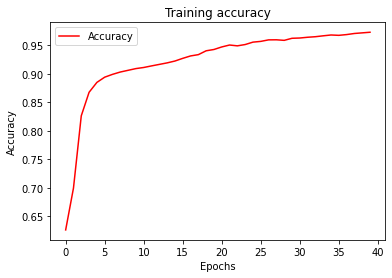

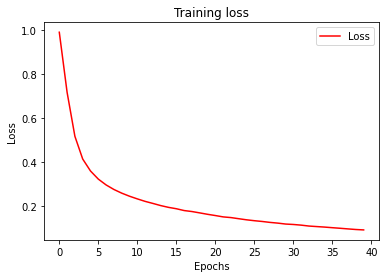

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=sent_hist.history['sparse_categorical_accuracy']
loss=sent_hist.history['loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r')
plt.title('Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy"])

plt.figure()

plt.plot(epochs, loss, 'r')

plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

In [ ]:
scores = sent_model.evaluate(text_train_pad, sent_train_seq, verbose=0)
print("%s: %.2f%%" % (sent_model.metrics_names[1], scores[1]*100))

sparse_categorical_accuracy: 97.37%


In [ ]:
sent_test_text = np.array(data_predict['Review Text'])
sent_test_input = np.array(pad_sequences(tokenizer.texts_to_sequences(sent_test_text), padding=padding_type,
                                    maxlen=max_length, truncating=trunc_type))
sprediction = sent_model.predict(sent_test_input)
print(sprediction)
print(sent_tokenizer.word_index)
slist_result = []
for row in range(len(sprediction)):
  sresult = sprediction[row].tolist().index(np.max(sprediction[row]))
  slist_result.append(sresult)
  print("prdiction- " + str(row) + " : " + str(sresult) + " with " + str(100*max(sprediction[row].tolist()*100)) + " percentage")
spre_result=[]
for s in slist_result:
  spre_result.append(sent_tokenizer.index_word[s])

data_predict['predict_sentiment'] = np.array(spre_result)
data_predict

[[2.5634070e-10 9.9999332e-01 2.4788768e-11 6.6620732e-06]
 [3.2045648e-06 9.0442550e-01 1.6926599e-03 9.3878582e-02]
 [4.4531707e-09 3.9899692e-09 9.9706799e-01 2.9320340e-03]
 [8.8773976e-17 1.5598560e-18 9.9999964e-01 3.7925378e-07]
 [1.1743323e-19 1.2644419e-22 1.0000000e+00 1.5290960e-08]]
{'positif': 1, 'negatif': 2, 'netral': 3}
prdiction- 0 : 1 with 99.99933242797852 percentage
prdiction- 1 : 1 with 90.44255018234253 percentage
prdiction- 2 : 2 with 99.70679879188538 percentage
prdiction- 3 : 2 with 99.99996423721313 percentage
prdiction- 4 : 2 with 100.0 percentage


,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title,Review Text,Developer Reply Date and Time,Developer Reply Millis Since Epoch,Developer Reply Text,Review Link,predict_sentiment
0,com.kai.kaiticketing,91.0,4.5.0,id,rolex,2021-07-01T12:59:10Z,1625144350241,2021-07-01T12:59:10Z,1625144350241,5,NaN,mantap dahh sangat memuaskan dan memudahkan,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,positif
1,com.kai.kaiticketing,NaN,NaN,id,merlin,2021-07-01T13:48:03Z,1625147283832,2021-07-01T13:48:03Z,1625147283832,5,NaN,Sukses,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,positif
2,com.kai.kaiticketing,90.0,4.4.9,id,RMX1821,2021-07-01T14:19:35Z,1625149175653,2021-07-01T14:19:35Z,1625149175653,3,NaN,"Membantu sekali kalo mau ke SBY, cuma yang jad...",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif
3,com.kai.kaiticketing,91.0,4.5.0,id,ugglite,2019-06-07T05:09:19Z,1559884159540,2021-07-01T14:33:58Z,1625150038477,1,NaN,Kenapa saya login dengan email dan kata sandi ...,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif
4,com.kai.kaiticketing,91.0,4.5.0,id,OP4863,2021-07-01T14:35:43Z,1625150143875,2021-07-01T14:35:43Z,1625150143875,1,NaN,"Kenapa saya pas udah pilih kursi , aplikasi ma...",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif


In [ ]:
sent_test_text = np.array(data_predict1['Review Text'])
sent_test_input = np.array(pad_sequences(tokenizer.texts_to_sequences(sent_test_text), padding=padding_type,
                                    maxlen=max_length, truncating=trunc_type))
sprediction = sent_model.predict(sent_test_input)
print(sprediction)
print(sent_tokenizer.word_index)
slist_result = []
for row in range(len(sprediction)):
  sresult = sprediction[row].tolist().index(np.max(sprediction[row]))
  slist_result.append(sresult)
  print("prdiction- " + str(row) + " : " + str(sresult) + " with " + str(100*max(sprediction[row].tolist()*100)) + " percentage")
spre_result=[]
for s in slist_result:
  spre_result.append(sent_tokenizer.index_word[s])

data_predict1['predict_sentiment'] = np.array(spre_result)
data_predict1

[[1.9976402e-07 3.0817671e-04 8.7559187e-01 1.2409975e-01]
 [3.0541191e-08 9.9984181e-01 1.6892654e-08 1.5817673e-04]
 [8.3599794e-11 1.1708032e-09 9.9912947e-01 8.7050471e-04]
 [1.3505428e-12 1.8057719e-12 9.9993360e-01 6.6440414e-05]
 [4.0967585e-10 1.0950397e-08 9.9784040e-01 2.1595880e-03]]
{'positif': 1, 'negatif': 2, 'netral': 3}
prdiction- 0 : 2 with 87.55918741226196 percentage
prdiction- 1 : 1 with 99.98418092727661 percentage
prdiction- 2 : 2 with 99.91294741630554 percentage
prdiction- 3 : 2 with 99.99336004257202 percentage
prdiction- 4 : 2 with 99.7840404510498 percentage


,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title,Review Text,Developer Reply Date and Time,Developer Reply Millis Since Epoch,Developer Reply Text,Review Link,predict_sentiment
0,com.kai.kaiticketing,91.0,4.5.0,id,rolex,2021-07-01T12:59:10Z,1625144350241,2021-07-01T12:59:10Z,1625144350241,5,NaN,jelek banget dah aplikasinya,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif
1,com.kai.kaiticketing,NaN,NaN,id,merlin,2021-07-01T13:48:03Z,1625147283832,2021-07-01T13:48:03Z,1625147283832,5,NaN,"bagus sih, memudahkan aku yang suka naik kereta",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,positif
2,com.kai.kaiticketing,90.0,4.4.9,id,RMX1821,2021-07-01T14:19:35Z,1625149175653,2021-07-01T14:19:35Z,1625149175653,3,NaN,"gabisa pesan, tiap pilih kursi pasti tiba tiba...",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif
3,com.kai.kaiticketing,91.0,4.5.0,id,ugglite,2019-06-07T05:09:19Z,1559884159540,2021-07-01T14:33:58Z,1625150038477,1,NaN,"padahal email sama password udah bener, tapi m...",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif
4,com.kai.kaiticketing,91.0,4.5.0,id,OP4863,2021-07-01T14:35:43Z,1625150143875,2021-07-01T14:35:43Z,1625150143875,1,NaN,kenapa tiap mau klik tombol bayar gabisa giman...,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif


In [ ]:
sent_test_text = np.array(data_predict2['Review Text'])
sent_test_input = np.array(pad_sequences(tokenizer.texts_to_sequences(sent_test_text), padding=padding_type,
                                    maxlen=max_length, truncating=trunc_type))
sprediction = sent_model.predict(sent_test_input)
print(sprediction)
print(sent_tokenizer.word_index)
slist_result = []
for row in range(len(sprediction)):
  sresult = sprediction[row].tolist().index(np.max(sprediction[row]))
  slist_result.append(sresult)
  print("prdiction- " + str(row) + " : " + str(sresult) + " with " + str(100*max(sprediction[row].tolist()*100)) + " percentage")
spre_result=[]
for s in slist_result:
  spre_result.append(sent_tokenizer.index_word[s])
print(slist_result)
data_predict2['predict_sentiment'] = np.array(spre_result)
data_predict2

[[2.2012925e-09 9.8737543e-09 9.9692070e-01 3.0792651e-03]
 [2.7448823e-09 1.0408042e-07 9.9369907e-01 6.3007893e-03]
 [1.6825680e-07 1.4238425e-04 9.0357298e-01 9.6284457e-02]
 [9.6900569e-12 4.4017578e-11 9.9974412e-01 2.5589322e-04]
 [5.7570281e-07 5.2899210e-04 8.1977510e-01 1.7969529e-01]]
{'positif': 1, 'negatif': 2, 'netral': 3}
prdiction- 0 : 2 with 99.69207048416138 percentage
prdiction- 1 : 2 with 99.36990737915039 percentage
prdiction- 2 : 2 with 90.35729765892029 percentage
prdiction- 3 : 2 with 99.97441172599792 percentage
prdiction- 4 : 2 with 81.97751045227051 percentage
[2, 2, 2, 2, 2]


,Review Text,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title,predict_sentiment
0,aplikasinya bagus sampai update terakhir. tida...,com.kai.kaiticketing,91.0,4.5.0,id,rolex,2021-07-01T12:59:10Z,1625144350241,2021-07-01T12:59:10Z,1625144350241,5,NaN,negatif
1,proses mengubah nomor telepon saya sangat susa...,com.kai.kaiticketing,NaN,NaN,id,merlin,2021-07-01T13:48:03Z,1625147283832,2021-07-01T13:48:03Z,1625147283832,5,NaN,negatif
2,aplikasi ini berjalan sangat lambat. saya tida...,com.kai.kaiticketing,90.0,4.4.9,id,RMX1821,2021-07-01T14:19:35Z,1625149175653,2021-07-01T14:19:35Z,1625149175653,3,NaN,negatif
3,selalu force close saat akan meproses pembayar...,com.kai.kaiticketing,91.0,4.5.0,id,ugglite,2019-06-07T05:09:19Z,1559884159540,2021-07-01T14:33:58Z,1625150038477,1,NaN,negatif
4,aplikasi ini sangat bagus. saya pengguna yang ...,com.kai.kaiticketing,91.0,4.5.0,id,OP4863,2021-07-01T14:35:43Z,1625150143875,2021-07-01T14:35:43Z,1625150143875,1,NaN,negatif


In [ ]:
sent_model.save('fix_sentiment.h5')

**TOPIC**

In [ ]:
topic_train_input = np.concatenate([text_train_pad, sent_train_pad], axis=1)

**BILSTM UNIT**

In [ ]:
ckpt_path = "topic/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path,
                                                 save_weights_only=True,
                                                 verbose=1)
topic_model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(4100, embedding_dim, input_length = max_length+1),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(8, activation = 'softmax')
])

topic_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
                     metrics = ['sparse_categorical_accuracy'])
topic_hist = topic_model.fit(topic_train_input, topic_train_seq, epochs = 60)

Epoch 1/60
260/260 [==============================] - 6s 13ms/step - loss: 0.8009 - sparse_categorical_accuracy: 0.7694
Epoch 2/60
260/260 [==============================] - 3s 13ms/step - loss: 0.4753 - sparse_categorical_accuracy: 0.8280
Epoch 3/60
260/260 [==============================] - 3s 13ms/step - loss: 0.3783 - sparse_categorical_accuracy: 0.8601
Epoch 4/60
260/260 [==============================] - 3s 13ms/step - loss: 0.3147 - sparse_categorical_accuracy: 0.8867
Epoch 5/60
260/260 [==============================] - 3s 13ms/step - loss: 0.2575 - sparse_categorical_accuracy: 0.9133
Epoch 6/60
260/260 [==============================] - 3s 13ms/step - loss: 0.2023 - sparse_categorical_accuracy: 0.9328
Epoch 7/60
260/260 [==============================] - 3s 13ms/step - loss: 0.1503 - sparse_categorical_accuracy: 0.9513
Epoch 8/60
260/260 [==============================] - 3s 13ms/step - loss: 0.1180 - sparse_categorical_accuracy: 0.9610
Epoch 9/60
260/260 [====================

In [ ]:
ckpt_path = "topic/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path,
                                                 save_weights_only=True,
                                                 verbose=1)
topic_model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(4100, embedding_dim, input_length = max_length+1),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(8, activation = 'softmax')
])

topic_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
                     metrics = ['sparse_categorical_accuracy'])
topic_hist = topic_model.fit(topic_train_input, topic_train_seq, epochs = 60)

Epoch 1/60
260/260 [==============================] - 6s 13ms/step - loss: 0.8090 - sparse_categorical_accuracy: 0.7653
Epoch 2/60
260/260 [==============================] - 3s 12ms/step - loss: 0.4563 - sparse_categorical_accuracy: 0.8332
Epoch 3/60
260/260 [==============================] - 3s 13ms/step - loss: 0.3603 - sparse_categorical_accuracy: 0.8722
Epoch 4/60
260/260 [==============================] - 3s 12ms/step - loss: 0.2966 - sparse_categorical_accuracy: 0.9005
Epoch 5/60
260/260 [==============================] - 3s 12ms/step - loss: 0.2244 - sparse_categorical_accuracy: 0.9288
Epoch 6/60
260/260 [==============================] - 3s 12ms/step - loss: 0.1612 - sparse_categorical_accuracy: 0.9496
Epoch 7/60
260/260 [==============================] - 3s 12ms/step - loss: 0.1250 - sparse_categorical_accuracy: 0.9615
Epoch 8/60
260/260 [==============================] - 3s 12ms/step - loss: 0.0958 - sparse_categorical_accuracy: 0.9715
Epoch 9/60
260/260 [====================

In [ ]:
ckpt_path = "topic/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path,
                                                 save_weights_only=True,
                                                 verbose=1)
topic_model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(4100, embedding_dim, input_length = max_length+1),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(8, activation = 'softmax')
])

topic_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
                     metrics = ['sparse_categorical_accuracy'])
topic_hist = topic_model.fit(topic_train_input, topic_train_seq, epochs = 60)

Epoch 1/60
260/260 [==============================] - 6s 13ms/step - loss: 0.7265 - sparse_categorical_accuracy: 0.7734
Epoch 2/60
260/260 [==============================] - 3s 12ms/step - loss: 0.4192 - sparse_categorical_accuracy: 0.8481
Epoch 3/60
260/260 [==============================] - 3s 12ms/step - loss: 0.3438 - sparse_categorical_accuracy: 0.8737
Epoch 4/60
260/260 [==============================] - 3s 12ms/step - loss: 0.2922 - sparse_categorical_accuracy: 0.8936
Epoch 5/60
260/260 [==============================] - 3s 12ms/step - loss: 0.2373 - sparse_categorical_accuracy: 0.9161
Epoch 6/60
260/260 [==============================] - 3s 12ms/step - loss: 0.1889 - sparse_categorical_accuracy: 0.9332
Epoch 7/60
260/260 [==============================] - 3s 12ms/step - loss: 0.1449 - sparse_categorical_accuracy: 0.9540
Epoch 8/60
260/260 [==============================] - 3s 12ms/step - loss: 0.1137 - sparse_categorical_accuracy: 0.9638
Epoch 9/60
260/260 [====================

In [ ]:
topic_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 151, 16)           65600     
                                                                 
 bidirectional_2 (Bidirectio  (None, 32)               4224      
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
Total params: 70,488
Trainable params: 70,488
Non-trainable params: 0
_________________________________________________________________


**DENSE**

In [ ]:
ckpt_path = "topic/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path,
                                                 save_weights_only=True,
                                                 verbose=1)
topic_model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(4100, embedding_dim, input_length = max_length+1),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
                             tf.keras.layers.Dense(16, activation = 'relu'),
                             tf.keras.layers.Dense(8, activation = 'softmax')
])

topic_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
                     metrics = ['sparse_categorical_accuracy'])
topic_hist = topic_model.fit(topic_train_input, topic_train_seq, epochs = 60)

Epoch 1/60
260/260 [==============================] - 6s 12ms/step - loss: 0.8677 - sparse_categorical_accuracy: 0.7614
Epoch 2/60
260/260 [==============================] - 3s 12ms/step - loss: 0.4675 - sparse_categorical_accuracy: 0.8320
Epoch 3/60
260/260 [==============================] - 3s 12ms/step - loss: 0.3527 - sparse_categorical_accuracy: 0.8787
Epoch 4/60
260/260 [==============================] - 3s 12ms/step - loss: 0.2562 - sparse_categorical_accuracy: 0.9215
Epoch 5/60
260/260 [==============================] - 3s 12ms/step - loss: 0.1846 - sparse_categorical_accuracy: 0.9444
Epoch 6/60
260/260 [==============================] - 3s 12ms/step - loss: 0.1356 - sparse_categorical_accuracy: 0.9596
Epoch 7/60
260/260 [==============================] - 3s 12ms/step - loss: 0.1058 - sparse_categorical_accuracy: 0.9677
Epoch 8/60
260/260 [==============================] - 3s 12ms/step - loss: 0.0858 - sparse_categorical_accuracy: 0.9743
Epoch 9/60
260/260 [====================

In [ ]:
scores = topic_model.evaluate(topic_train_input, topic_train_seq, verbose=0)
print("%s: %.2f%%" % (topic_model.metrics_names[1], scores[1]*100))

sparse_categorical_accuracy: 99.98%


<Figure size 432x288 with 0 Axes>

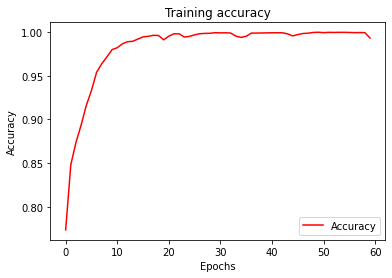

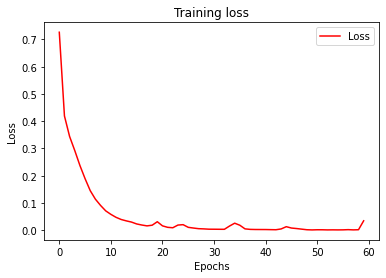

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=topic_hist.history['sparse_categorical_accuracy']
loss=topic_hist.history['loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r')
plt.title('Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy"])

plt.figure()

plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()


In [ ]:
testing_text = np.array(data_predict['Review Text'])
testing_text = pad_sequences(tokenizer.texts_to_sequences(testing_text), padding=padding_type, truncating=trunc_type, maxlen=max_length)
testing_sent = np.array(data_predict['predict_sentiment'])
testing_sent = pad_sequences(sent_tokenizer.texts_to_sequences(testing_sent), padding=padding_type, truncating=trunc_type, maxlen=1)
testing_input = np.concatenate([testing_text, testing_sent], axis=1)
predicting = topic_model.predict(np.array(testing_input))
listresult = []
print(predicting)
print(topic_tokenizer.word_index)
for row in range(len(predicting)):
  result = predicting[row].tolist().index(np.max(predicting[row]))
  listresult.append(result)
  print("prediction- " + str(row) + " : " + str(result) + " with " + str(100*max(predicting[row].tolist()*100)) + " percentage")

preresult = []

for aa in listresult:
  preresult.append(topic_tokenizer.index_word[aa])

data_predict['predict_topic'] = np.array(preresult)
data_predict

[[1.95460018e-14 1.00000000e+00 1.10459194e-11 1.41056835e-18
  1.05453007e-18 1.30006805e-08 4.32338690e-22 2.82848900e-09]
 [2.18886888e-11 9.99992847e-01 2.09407647e-09 2.49397196e-14
  5.91326882e-16 6.06627782e-06 5.39467740e-17 1.03311129e-06]
 [3.16004778e-10 1.63133955e-05 2.53884937e-05 1.11258489e-13
  6.38644519e-13 4.28090789e-05 2.13594933e-10 9.99915481e-01]
 [2.59552139e-14 1.71607019e-06 4.30950775e-10 9.99998093e-01
  3.22271073e-12 2.56350976e-08 1.54879373e-07 2.56396179e-14]
 [4.77335023e-13 7.93185038e-08 9.99986649e-01 1.14018798e-15
  9.78329808e-06 5.00289588e-13 1.34018263e-09 3.39245753e-06]]
{'feedback': 1, 'pemesanan': 2, 'registrasilogin': 3, 'pembayaran': 4, 'error': 5, 'pengaturan': 6, 'pembatalan': 7}
prediction- 0 : 1 with 100.0 percentage
prediction- 1 : 1 with 99.9992847442627 percentage
prediction- 2 : 7 with 99.99154806137085 percentage
prediction- 3 : 3 with 99.99980926513672 percentage
prediction- 4 : 2 with 99.99866485595703 percentage


,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title,Review Text,Developer Reply Date and Time,Developer Reply Millis Since Epoch,Developer Reply Text,Review Link,predict_sentiment,predict_topic
0,com.kai.kaiticketing,91.0,4.5.0,id,rolex,2021-07-01T12:59:10Z,1625144350241,2021-07-01T12:59:10Z,1625144350241,5,NaN,mantap dahh sangat memuaskan dan memudahkan,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,positif,feedback
1,com.kai.kaiticketing,NaN,NaN,id,merlin,2021-07-01T13:48:03Z,1625147283832,2021-07-01T13:48:03Z,1625147283832,5,NaN,Sukses,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,positif,feedback
2,com.kai.kaiticketing,90.0,4.4.9,id,RMX1821,2021-07-01T14:19:35Z,1625149175653,2021-07-01T14:19:35Z,1625149175653,3,NaN,"Membantu sekali kalo mau ke SBY, cuma yang jad...",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif,pembatalan
3,com.kai.kaiticketing,91.0,4.5.0,id,ugglite,2019-06-07T05:09:19Z,1559884159540,2021-07-01T14:33:58Z,1625150038477,1,NaN,Kenapa saya login dengan email dan kata sandi ...,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif,registrasilogin
4,com.kai.kaiticketing,91.0,4.5.0,id,OP4863,2021-07-01T14:35:43Z,1625150143875,2021-07-01T14:35:43Z,1625150143875,1,NaN,"Kenapa saya pas udah pilih kursi , aplikasi ma...",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif,pemesanan


In [ ]:
testing_text = np.array(data_predict1['Review Text'])
testing_text = pad_sequences(tokenizer.texts_to_sequences(testing_text), padding=padding_type, truncating=trunc_type, maxlen=max_length)
testing_sent = np.array(data_predict1['predict_sentiment'])
testing_sent = pad_sequences(sent_tokenizer.texts_to_sequences(testing_sent), padding=padding_type, truncating=trunc_type, maxlen=1)
testing_input = np.concatenate([testing_text, testing_sent], axis=1)
predicting = topic_model.predict(np.array(testing_input))
listresult = []
print(predicting)
print(topic_tokenizer.word_index)
for row in range(len(predicting)):
  result = predicting[row].tolist().index(np.max(predicting[row]))
  listresult.append(result)
  print("prediction- " + str(row) + " : " + str(result) + " with " + str(100*max(predicting[row].tolist()*100)) + " percentage")

preresult = []

for aa in listresult:
  preresult.append(topic_tokenizer.index_word[aa])

data_predict1['predict_topic'] = np.array(preresult)
data_predict1

[[3.20353965e-12 9.99997854e-01 3.92338662e-10 7.15599607e-15
  5.08530682e-16 2.09883638e-06 9.25887248e-18 6.21179481e-08]
 [1.17277797e-13 1.00000000e+00 7.04500139e-11 7.89210624e-18
  4.65033827e-18 1.84410407e-08 5.54890688e-21 1.65269416e-08]
 [1.60070579e-13 4.04473582e-07 9.99996066e-01 9.68153629e-17
  2.26217730e-06 2.88666762e-14 2.32033368e-11 1.26681289e-06]
 [3.14420426e-14 7.39487461e-07 6.44623688e-10 9.99999166e-01
  2.32967465e-12 3.24724105e-08 1.07730884e-07 4.09078492e-14]
 [1.37871499e-13 3.59752698e-06 1.20124918e-04 5.97652761e-10
  9.99856114e-01 2.25855792e-12 2.01680523e-05 1.80453297e-09]]
{'feedback': 1, 'pemesanan': 2, 'registrasilogin': 3, 'pembayaran': 4, 'error': 5, 'pengaturan': 6, 'pembatalan': 7}
prediction- 0 : 1 with 99.99978542327881 percentage
prediction- 1 : 1 with 100.0 percentage
prediction- 2 : 2 with 99.99960660934448 percentage
prediction- 3 : 3 with 99.99991655349731 percentage
prediction- 4 : 4 with 99.98561143875122 percentage


,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title,Review Text,Developer Reply Date and Time,Developer Reply Millis Since Epoch,Developer Reply Text,Review Link,predict_sentiment,predict_topic
0,com.kai.kaiticketing,91.0,4.5.0,id,rolex,2021-07-01T12:59:10Z,1625144350241,2021-07-01T12:59:10Z,1625144350241,5,NaN,jelek banget dah aplikasinya,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif,feedback
1,com.kai.kaiticketing,NaN,NaN,id,merlin,2021-07-01T13:48:03Z,1625147283832,2021-07-01T13:48:03Z,1625147283832,5,NaN,"bagus sih, memudahkan aku yang suka naik kereta",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,positif,feedback
2,com.kai.kaiticketing,90.0,4.4.9,id,RMX1821,2021-07-01T14:19:35Z,1625149175653,2021-07-01T14:19:35Z,1625149175653,3,NaN,"gabisa pesan, tiap pilih kursi pasti tiba tiba...",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif,pemesanan
3,com.kai.kaiticketing,91.0,4.5.0,id,ugglite,2019-06-07T05:09:19Z,1559884159540,2021-07-01T14:33:58Z,1625150038477,1,NaN,"padahal email sama password udah bener, tapi m...",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif,registrasilogin
4,com.kai.kaiticketing,91.0,4.5.0,id,OP4863,2021-07-01T14:35:43Z,1625150143875,2021-07-01T14:35:43Z,1625150143875,1,NaN,kenapa tiap mau klik tombol bayar gabisa giman...,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif,pembayaran


In [ ]:
testing_text = np.array(data_predict2['Review Text'])
testing_text = pad_sequences(tokenizer.texts_to_sequences(testing_text), padding=padding_type, truncating=trunc_type, maxlen=max_length)
testing_sent = np.array(data_predict2['predict_sentiment'])
testing_sent = pad_sequences(sent_tokenizer.texts_to_sequences(testing_sent), padding=padding_type, truncating=trunc_type, maxlen=1)
testing_input = np.concatenate([testing_text, testing_sent], axis=1)
predicting = topic_model.predict(np.array(testing_input))
listresult = []
print(predicting)
print(topic_tokenizer.word_index)
for row in range(len(predicting)):
  result = predicting[row].tolist().index(np.max(predicting[row]))
  listresult.append(result)
  print("prediction- " + str(row) + " : " + str(result) + " with " + str(100*max(predicting[row].tolist()*100)) + " percentage")

preresult = []

for aa in listresult:
  preresult.append(topic_tokenizer.index_word[aa])

data_predict2['predict_topic'] = np.array(preresult)
data_predict2

[[1.23818168e-07 2.14527667e-01 7.54683793e-01 5.63261868e-11
  9.87724434e-07 2.46736090e-06 4.73276422e-08 3.07849161e-02]
 [3.55403762e-10 2.43118666e-05 1.22992415e-05 9.35534775e-01
  1.16757508e-06 1.49138577e-04 6.42783269e-02 3.02688541e-08]
 [8.94015385e-13 1.82548717e-07 9.99980927e-01 1.79042796e-15
  1.58824041e-05 2.96450202e-13 8.93738805e-10 2.96142980e-06]
 [7.92472533e-13 1.12663372e-06 6.09764457e-02 1.64179846e-12
  9.39017415e-01 7.67642514e-13 4.82413043e-06 2.55142425e-07]
 [8.86518116e-12 9.99987602e-01 4.70543049e-10 2.66691474e-14
  6.08068383e-16 1.20843206e-05 3.74784253e-17 3.21421084e-07]]
{'feedback': 1, 'pemesanan': 2, 'registrasilogin': 3, 'pembayaran': 4, 'error': 5, 'pengaturan': 6, 'pembatalan': 7}
prediction- 0 : 2 with 75.4683792591095 percentage
prediction- 1 : 3 with 93.55347752571106 percentage
prediction- 2 : 2 with 99.99809265136719 percentage
prediction- 3 : 4 with 93.90174150466919 percentage
prediction- 4 : 1 with 99.99876022338867 percentag

,Review Text,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title,predict_sentiment,predict_topic
0,aplikasinya bagus sampai update terakhir. tida...,com.kai.kaiticketing,91.0,4.5.0,id,rolex,2021-07-01T12:59:10Z,1625144350241,2021-07-01T12:59:10Z,1625144350241,5,NaN,negatif,pemesanan
1,proses mengubah nomor telepon saya sangat susa...,com.kai.kaiticketing,NaN,NaN,id,merlin,2021-07-01T13:48:03Z,1625147283832,2021-07-01T13:48:03Z,1625147283832,5,NaN,negatif,registrasilogin
2,aplikasi ini berjalan sangat lambat. saya tida...,com.kai.kaiticketing,90.0,4.4.9,id,RMX1821,2021-07-01T14:19:35Z,1625149175653,2021-07-01T14:19:35Z,1625149175653,3,NaN,negatif,pemesanan
3,selalu force close saat akan meproses pembayar...,com.kai.kaiticketing,91.0,4.5.0,id,ugglite,2019-06-07T05:09:19Z,1559884159540,2021-07-01T14:33:58Z,1625150038477,1,NaN,negatif,pembayaran
4,aplikasi ini sangat bagus. saya pengguna yang ...,com.kai.kaiticketing,91.0,4.5.0,id,OP4863,2021-07-01T14:35:43Z,1625150143875,2021-07-01T14:35:43Z,1625150143875,1,NaN,negatif,feedback


In [ ]:
topic_model.save('fix_topic.h5')

**Detail**

In [ ]:
detail_train_input = np.concatenate([text_train_pad, sent_train_pad, topic_train_pad], axis=1)

In [ ]:
ckpt_path = "detail/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path,
                                                 save_weights_only=True,
                                                 verbose=1)
detail_model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(4100, embedding_dim, input_length = max_length+2),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(22, activation = 'softmax')
])

detail_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
                     metrics = ['sparse_categorical_accuracy'])
detail_hist = detail_model.fit(detail_train_input, detail_train_seq, epochs = 60, 
                          callbacks = [cp_callback])

Epoch 1/60
260/260 [==============================] - ETA: 0s - loss: 1.4308 - sparse_categorical_accuracy: 0.6298
Epoch 1: saving model to detail/cp.ckpt
260/260 [==============================] - 6s 12ms/step - loss: 1.4308 - sparse_categorical_accuracy: 0.6298
Epoch 2/60
260/260 [==============================] - ETA: 0s - loss: 0.7275 - sparse_categorical_accuracy: 0.7622
Epoch 2: saving model to detail/cp.ckpt
260/260 [==============================] - 3s 12ms/step - loss: 0.7275 - sparse_categorical_accuracy: 0.7622
Epoch 3/60
260/260 [==============================] - ETA: 0s - loss: 0.5648 - sparse_categorical_accuracy: 0.8096
Epoch 3: saving model to detail/cp.ckpt
260/260 [==============================] - 3s 12ms/step - loss: 0.5648 - sparse_categorical_accuracy: 0.8096
Epoch 4/60
259/260 [============================>.] - ETA: 0s - loss: 0.4045 - sparse_categorical_accuracy: 0.8751
Epoch 4: saving model to detail/cp.ckpt
260/260 [==============================] - 3s 12ms/st

In [ ]:
ckpt_path = "detail/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path,
                                                 save_weights_only=True,
                                                 verbose=1)
detail_model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(4100, embedding_dim, input_length = max_length+2),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(22, activation = 'softmax')
])

detail_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
                     metrics = ['sparse_categorical_accuracy'])
detail_hist = detail_model.fit(detail_train_input, detail_train_seq, epochs = 60, 
                          callbacks = [cp_callback])

Epoch 1/60
260/260 [==============================] - ETA: 0s - loss: 1.3851 - sparse_categorical_accuracy: 0.6520
Epoch 1: saving model to detail/cp.ckpt
260/260 [==============================] - 6s 14ms/step - loss: 1.3851 - sparse_categorical_accuracy: 0.6520
Epoch 2/60
258/260 [============================>.] - ETA: 0s - loss: 0.6960 - sparse_categorical_accuracy: 0.7843
Epoch 2: saving model to detail/cp.ckpt
260/260 [==============================] - 3s 13ms/step - loss: 0.6962 - sparse_categorical_accuracy: 0.7843
Epoch 3/60
258/260 [============================>.] - ETA: 0s - loss: 0.4916 - sparse_categorical_accuracy: 0.8389
Epoch 3: saving model to detail/cp.ckpt
260/260 [==============================] - 3s 13ms/step - loss: 0.4907 - sparse_categorical_accuracy: 0.8391
Epoch 4/60
257/260 [============================>.] - ETA: 0s - loss: 0.3495 - sparse_categorical_accuracy: 0.8704
Epoch 4: saving model to detail/cp.ckpt
260/260 [==============================] - 3s 13ms/st

In [ ]:
ckpt_path = "detail/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path,
                                                 save_weights_only=True,
                                                 verbose=1)
detail_model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(4100, embedding_dim, input_length = max_length+2),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(22, activation = 'softmax')
])

detail_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
                     metrics = ['sparse_categorical_accuracy'])
detail_hist = detail_model.fit(detail_train_input, detail_train_seq, epochs = 60, 
                          callbacks = [cp_callback])

Epoch 1/60
260/260 [==============================] - ETA: 0s - loss: 1.2745 - sparse_categorical_accuracy: 0.6707
Epoch 1: saving model to detail/cp.ckpt
260/260 [==============================] - 6s 13ms/step - loss: 1.2745 - sparse_categorical_accuracy: 0.6707
Epoch 2/60
260/260 [==============================] - ETA: 0s - loss: 0.5993 - sparse_categorical_accuracy: 0.8057
Epoch 2: saving model to detail/cp.ckpt
260/260 [==============================] - 3s 13ms/step - loss: 0.5993 - sparse_categorical_accuracy: 0.8057
Epoch 3/60
260/260 [==============================] - ETA: 0s - loss: 0.4093 - sparse_categorical_accuracy: 0.8520
Epoch 3: saving model to detail/cp.ckpt
260/260 [==============================] - 3s 13ms/step - loss: 0.4093 - sparse_categorical_accuracy: 0.8520
Epoch 4/60
260/260 [==============================] - ETA: 0s - loss: 0.3248 - sparse_categorical_accuracy: 0.8761
Epoch 4: saving model to detail/cp.ckpt
260/260 [==============================] - 3s 13ms/st

In [ ]:
detail_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 152, 16)           65600     
                                                                 
 bidirectional_9 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 22)                726       
                                                                 
Total params: 80,950
Trainable params: 80,950
Non-trainable params: 0
_________________________________________________________________


In [ ]:
scores = detail_model.evaluate(detail_train_input, detail_train_seq, verbose=0)
print("%s: %.2f%%" % (detail_model.metrics_names[1], scores[1]*100))

sparse_categorical_accuracy: 99.84%


<Figure size 432x288 with 0 Axes>

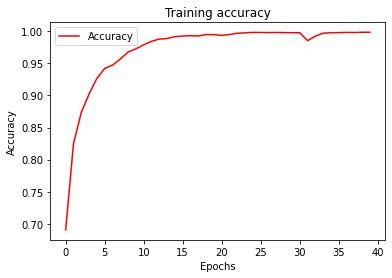

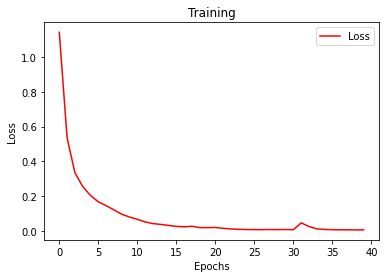

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=detail_hist.history['sparse_categorical_accuracy']
loss=detail_hist.history['loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r')
plt.title('Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy"])

plt.figure()

plt.plot(epochs, loss, 'r')
plt.title('Training')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

In [ ]:
testing_text = np.array(data_predict['Review Text'])
testing_text = pad_sequences(tokenizer.texts_to_sequences(testing_text), padding=padding_type, truncating=trunc_type, maxlen=max_length)
testing_sent = np.array(data_predict['predict_sentiment'])
testing_sent = pad_sequences(sent_tokenizer.texts_to_sequences(testing_sent), padding=padding_type, truncating=trunc_type, maxlen=1)
testing_topic = np.array(data_predict['predict_topic'])
testing_topic = pad_sequences(topic_tokenizer.texts_to_sequences(testing_topic), padding=padding_type, truncating=trunc_type, maxlen=1)
testing_input = np.concatenate([testing_text, testing_sent, testing_topic], axis=1)
predicting = detail_model.predict(np.array(testing_input))
listresult = []
for row in range(len(predicting)):
  result = predicting[row].tolist().index(np.max(predicting[row]))
  listresult.append(result)
  print("prediction- " + str(row) + " : " + str(result) + " with " + str(100*max(predicting[row].tolist()*100)) + " percentage")


preresult = []

for aa in listresult:
  preresult.append(detail_tokenizer.index_word[aa])

data_predict['detail_topic_prediction'] = np.array(preresult)
data_predict

prediction- 0 : 1 with 99.99985694885254 percentage
prediction- 1 : 2 with 99.10287857055664 percentage
prediction- 2 : 13 with 95.73410153388977 percentage
prediction- 3 : 3 with 99.99589920043945 percentage
prediction- 4 : 4 with 99.99203681945801 percentage


,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title,Review Text,Developer Reply Date and Time,Developer Reply Millis Since Epoch,Developer Reply Text,Review Link,predict_sentiment,predict_topic,detail_topic_prediction
0,com.kai.kaiticketing,91.0,4.5.0,id,rolex,2021-07-01T12:59:10Z,1625144350241,2021-07-01T12:59:10Z,1625144350241,5,NaN,mantap dahh sangat memuaskan dan memudahkan,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,positif,feedback,baik
1,com.kai.kaiticketing,NaN,NaN,id,merlin,2021-07-01T13:48:03Z,1625147283832,2021-07-01T13:48:03Z,1625147283832,5,NaN,Sukses,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,positif,feedback,lain
2,com.kai.kaiticketing,90.0,4.4.9,id,RMX1821,2021-07-01T14:19:35Z,1625149175653,2021-07-01T14:19:35Z,1625149175653,3,NaN,"Membantu sekali kalo mau ke SBY, cuma yang jad...",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif,pembatalan,errorpembatalan
3,com.kai.kaiticketing,91.0,4.5.0,id,ugglite,2019-06-07T05:09:19Z,1559884159540,2021-07-01T14:33:58Z,1625150038477,1,NaN,Kenapa saya login dengan email dan kata sandi ...,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif,registrasilogin,login
4,com.kai.kaiticketing,91.0,4.5.0,id,OP4863,2021-07-01T14:35:43Z,1625150143875,2021-07-01T14:35:43Z,1625150143875,1,NaN,"Kenapa saya pas udah pilih kursi , aplikasi ma...",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif,pemesanan,errorpemesanan


In [ ]:
testing_text = np.array(data_predict1['Review Text'])
testing_text = pad_sequences(tokenizer.texts_to_sequences(testing_text), padding=padding_type, truncating=trunc_type, maxlen=max_length)
testing_sent = np.array(data_predict1['predict_sentiment'])
testing_sent = pad_sequences(sent_tokenizer.texts_to_sequences(testing_sent), padding=padding_type, truncating=trunc_type, maxlen=1)
testing_topic = np.array(data_predict1['predict_topic'])
testing_topic = pad_sequences(topic_tokenizer.texts_to_sequences(testing_topic), padding=padding_type, truncating=trunc_type, maxlen=1)
testing_input = np.concatenate([testing_text, testing_sent, testing_topic], axis=1)
predicting = detail_model.predict(np.array(testing_input))
listresult = []
for row in range(len(predicting)):
  result = predicting[row].tolist().index(np.max(predicting[row]))
  listresult.append(result)
  print("prediction- " + str(row) + " : " + str(result) + " with " + str(100*max(predicting[row].tolist()*100)) + " percentage")


preresult = []

for aa in listresult:
  preresult.append(detail_tokenizer.index_word[aa])

data_predict1['detail_topic_prediction'] = np.array(preresult)
data_predict1

prediction- 0 : 2 with 99.99371767044067 percentage
prediction- 1 : 1 with 99.99991655349731 percentage
prediction- 2 : 4 with 99.95558857917786 percentage
prediction- 3 : 3 with 99.99901056289673 percentage
prediction- 4 : 9 with 99.99496936798096 percentage


,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title,Review Text,Developer Reply Date and Time,Developer Reply Millis Since Epoch,Developer Reply Text,Review Link,predict_sentiment,predict_topic,detail_topic_prediction
0,com.kai.kaiticketing,91.0,4.5.0,id,rolex,2021-07-01T12:59:10Z,1625144350241,2021-07-01T12:59:10Z,1625144350241,5,NaN,jelek banget dah aplikasinya,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif,feedback,lain
1,com.kai.kaiticketing,NaN,NaN,id,merlin,2021-07-01T13:48:03Z,1625147283832,2021-07-01T13:48:03Z,1625147283832,5,NaN,"bagus sih, memudahkan aku yang suka naik kereta",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,positif,feedback,baik
2,com.kai.kaiticketing,90.0,4.4.9,id,RMX1821,2021-07-01T14:19:35Z,1625149175653,2021-07-01T14:19:35Z,1625149175653,3,NaN,"gabisa pesan, tiap pilih kursi pasti tiba tiba...",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif,pemesanan,errorpemesanan
3,com.kai.kaiticketing,91.0,4.5.0,id,ugglite,2019-06-07T05:09:19Z,1559884159540,2021-07-01T14:33:58Z,1625150038477,1,NaN,"padahal email sama password udah bener, tapi m...",NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif,registrasilogin,login
4,com.kai.kaiticketing,91.0,4.5.0,id,OP4863,2021-07-01T14:35:43Z,1625150143875,2021-07-01T14:35:43Z,1625150143875,1,NaN,kenapa tiap mau klik tombol bayar gabisa giman...,NaN,NaN,NaN,http://play.google.com/console/developers/7684...,negatif,pembayaran,errorpembayaran


In [ ]:
testing_text = np.array(data_predict2['Review Text'])
testing_text = pad_sequences(tokenizer.texts_to_sequences(testing_text), padding=padding_type, truncating=trunc_type, maxlen=max_length)
testing_sent = np.array(data_predict2['predict_sentiment'])
testing_sent = pad_sequences(sent_tokenizer.texts_to_sequences(testing_sent), padding=padding_type, truncating=trunc_type, maxlen=1)
testing_topic = np.array(data_predict2['predict_topic'])
testing_topic = pad_sequences(topic_tokenizer.texts_to_sequences(testing_topic), padding=padding_type, truncating=trunc_type, maxlen=1)
testing_input = np.concatenate([testing_text, testing_sent, testing_topic], axis=1)
predicting = detail_model.predict(np.array(testing_input))
listresult = []
for row in range(len(predicting)):
  result = predicting[row].tolist().index(np.max(predicting[row]))
  listresult.append(result)
  print("prediction- " + str(row) + " : " + str(result) + " with " + str(100*max(predicting[row].tolist()*100)) + " percentage")


preresult = []

for aa in listresult:
  preresult.append(detail_tokenizer.index_word[aa])

data_predict2['detail_topic_prediction'] = np.array(preresult)
data_predict2

prediction- 0 : 19 with 55.12498617172241 percentage
prediction- 1 : 10 with 99.99817609786987 percentage
prediction- 2 : 18 with 97.82857894897461 percentage
prediction- 3 : 14 with 68.95720362663269 percentage
prediction- 4 : 2 with 99.99691247940063 percentage


,Review Text,Package Name,App Version Code,App Version Name,Reviewer Language,Device,Review Submit Date and Time,Review Submit Millis Since Epoch,Review Last Update Date and Time,Review Last Update Millis Since Epoch,Star Rating,Review Title,predict_sentiment,predict_topic,detail_topic_prediction
0,aplikasinya bagus sampai update terakhir. tida...,com.kai.kaiticketing,91.0,4.5.0,id,rolex,2021-07-01T12:59:10Z,1625144350241,2021-07-01T12:59:10Z,1625144350241,5,NaN,negatif,pemesanan,maxpemesanan
1,proses mengubah nomor telepon saya sangat susa...,com.kai.kaiticketing,NaN,NaN,id,merlin,2021-07-01T13:48:03Z,1625147283832,2021-07-01T13:48:03Z,1625147283832,5,NaN,negatif,pengaturan,editprofil
2,aplikasi ini berjalan sangat lambat. saya tida...,com.kai.kaiticketing,90.0,4.4.9,id,RMX1821,2021-07-01T14:19:35Z,1625149175653,2021-07-01T14:19:35Z,1625149175653,3,NaN,negatif,pemesanan,editpemesanan
3,selalu force close saat akan meproses pembayar...,com.kai.kaiticketing,91.0,4.5.0,id,ugglite,2019-06-07T05:09:19Z,1559884159540,2021-07-01T14:33:58Z,1625150038477,1,NaN,negatif,pembayaran,paymentnotif
4,aplikasi ini sangat bagus. saya pengguna yang ...,com.kai.kaiticketing,91.0,4.5.0,id,OP4863,2021-07-01T14:35:43Z,1625150143875,2021-07-01T14:35:43Z,1625150143875,1,NaN,negatif,feedback,lain


In [ ]:
detail_model.save('fix_detail.h5')

In [ ]:
#no nulltext

import pandas as pd
from sklearn import metrics

data = pd.read_csv('labelled_tambahan.csv')
data_result = pd.read_csv('result_labelled_tambahan.csv')

Y_act = [data['sentiment'].to_list(), data['topic'].to_list(), data['detail_topic'].to_list()]
Y_pred = [data_result['Sentiment Prediction'].to_list(), data_result['Topic Prediction'].to_list(), data_result['Detail Prediction'].to_list()]

print(Y_act)
print(Y_pred)
def calc_metrics(label, num):
  print(metrics.classification_report(Y_act[num], Y_pred[num], digits=4))

calc_metrics('sentiment', 0)
calc_metrics('topic', 1)
calc_metrics('detail topic', 2)

[['negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'positif', 'negatif', 'negatif', 'positif', 'positif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'positif', 'negatif', 'negatif', 'negatif', 'positif', 'positif', 'positif', 'netral', 'netral', 'negatif', 'negatif', 'negatif', 'positif', 'negatif', 'negatif', 'negatif', 'negatif', 'positif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'positif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'positif', 'negatif', 'negatif', 'negatif', 'netral', 'positif', 'positif', 'negatif', 'netral', 'negatif', 'netral', 'netral', 'negatif', 'positif', 'positif', 'positif', 'negatif', 'positif', 'netral', 'negatif', 'negatif', 'netral', 'negatif', 'negatif', 'negatif', 'netral', 'netral', 'negatif', 'positif', 'negatif', 'negati

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#baru

import pandas as pd
from sklearn import metrics

data = pd.read_csv('data_testing.csv', delimiter =';')
data_result = pd.read_csv('data_hasil.csv')

Y_act = [data['sentiment'].to_list(), data['topic'].to_list(), data['detail_topic'].to_list()]
Y_pred = [data_result['Sentiment Prediction'].to_list(), data_result['Topic Prediction'].to_list(), data_result['Detail Prediction'].to_list()]

print(Y_act)
print(Y_pred)
def calc_metrics(label, num):
  print(metrics.classification_report(Y_act[num], Y_pred[num], digits=4))

calc_metrics('sentiment', 0)
calc_metrics('topic', 1)
calc_metrics('detail topic', 2)

[['negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'positif', 'negatif', 'negatif', 'positif', 'positif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'positif', 'negatif', 'negatif', 'negatif', 'positif', 'positif', 'positif', 'netral', 'netral', 'negatif', 'negatif', 'negatif', 'positif', 'negatif', 'negatif', 'negatif', 'negatif', 'positif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'positif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'negatif', 'positif', 'negatif', 'negatif', 'negatif', 'netral', 'positif', 'positif', 'negatif', 'netral', 'negatif', 'netral', 'netral', 'negatif', 'positif', 'positif', 'positif', 'negatif', 'positif', 'netral', 'negatif', 'negatif', 'netral', 'negatif', 'negatif', 'negatif', 'netral', 'netral', 'negatif', 'positif', 'negatif', 'negati

#Breakdown

In [ ]:
from tensorflow.keras.models import load_model

sent_model = load_model('nonull_model_sent-nonumber.h5')
topic_model = load_model('fix_topic.h5')
detail_model = load_model('fix_detail.h5')

In [ ]:
sentences = [
             'bagus dan membantu',
             'pelayanannya bagus nyaman dan ac nya terasa segernya keep clean ya',
             'update september malah error terus ketika masuk halaman pilih kursi tolong diperbaiki min'
]
#1 pos 2 neg 3 net
sentimen = [
            'positif',
            'positif',
            'positif'
]
#feedback 1 pemesanan 2
topic = [
         'feedback',
         'feedback',
         'pemesanan'
]
#1 baik 4 error pem
detail = [
           'baik',
           'baik',
           'errorpemesanan'
]

In [ ]:
contoh_tok = Tokenizer(vocab_size, oov_token = oov_tok)
contoh_tok.fit_on_texts(sentences)
contoh_tok.word_index

label_tok_sent = Tokenizer()
label_tok_sent.fit_on_texts(sentimen)

label_tok_topic = Tokenizer()
label_tok_topic.fit_on_texts(topic)

label_tok_detail = Tokenizer()
label_tok_detail.fit_on_texts(detail)

In [ ]:
from matplotlib import text
text_contoh_seq = contoh_tok.texts_to_sequences(sentences)
text_contoh_pad = pad_sequences(text_contoh_seq, padding=padding_type, truncating=trunc_type, 
                               maxlen=max_length)

sent_contoh_seq = np.array(label_tok_sent.texts_to_sequences(sentimen))
sent_contoh_pad = pad_sequences(sent_contoh_seq, padding=padding_type, truncating=trunc_type, maxlen=1)

#==========================TOPIC SEQ & PAD==================================
topic_contoh_seq = np.array(label_tok_topic.texts_to_sequences(topic))
topic_contoh_pad = pad_sequences(topic_contoh_seq, padding=padding_type, truncating=trunc_type, maxlen=1)

#==========================DETAIL SEQ & PAD==================================
detail_train_seq = np.array(label_tok_detail.texts_to_sequences(detail))
print(text_contoh_pad)

[[ 2  3  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 5  2  6  3  7  8  9 10 11 12 13  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [14 15 16 17 18 19 20 21 22 23 24 25 26  0  0  0  0  0  0  0  0  0  0

In [ ]:
ckpt_path = "sent/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path,
                                                 save_weights_only=True,
                                                 verbose=1)
embedding = tf.keras.layers.Embedding(4100, embedding_dim, input_length = max_length)
average = tf.keras.layers.GlobalAveragePooling1D()
dense1 = tf.keras.layers.Dense(32, activation='relu')
dense2 = tf.keras.layers.Dense(4, activation = 'softmax')
sent_model = tf.keras.Sequential([
                             embedding,
                             average,
                             dense1,
                             dense2
])

sent_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
                   metrics = ['sparse_categorical_accuracy'])
sent_hist = sent_model.fit(tf.stack(text_contoh_pad), sent_contoh_seq, 
                         epochs = 40, callbacks= [cp_callback])

Epoch 1/40
1/1 [==============================] - ETA: 0s - loss: 1.3962 - sparse_categorical_accuracy: 0.0000e+00
Epoch 1: saving model to sent/cp.ckpt
1/1 [==============================] - 1s 881ms/step - loss: 1.3962 - sparse_categorical_accuracy: 0.0000e+00
Epoch 2/40
1/1 [==============================] - ETA: 0s - loss: 1.3891 - sparse_categorical_accuracy: 0.0000e+00
Epoch 2: saving model to sent/cp.ckpt
1/1 [==============================] - 0s 33ms/step - loss: 1.3891 - sparse_categorical_accuracy: 0.0000e+00
Epoch 3/40
1/1 [==============================] - ETA: 0s - loss: 1.3825 - sparse_categorical_accuracy: 0.0000e+00
Epoch 3: saving model to sent/cp.ckpt
1/1 [==============================] - 0s 34ms/step - loss: 1.3825 - sparse_categorical_accuracy: 0.0000e+00
Epoch 4/40
1/1 [==============================] - ETA: 0s - loss: 1.3759 - sparse_categorical_accuracy: 0.0000e+00
Epoch 4: saving model to sent/cp.ckpt
1/1 [==============================] - 0s 35ms/step - loss: 

In [ ]:
ckpt_path = "sent/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path,
                                                 save_weights_only=True,
                                                 verbose=1)
embed = tf.keras.layers.Embedding(4100, embedding_dim, input_length = max_length)
sent_model = tf.keras.Sequential([
                                  embed,
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dense(4, activation = 'softmax')
])

sent_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
                   metrics = ['sparse_categorical_accuracy'])
sent_hist = sent_model.fit(text_train_pad, sent_train_label_seq, 
                         epochs = 40, callbacks= [cp_callback])

Epoch 1/40
256/260 [============================>.] - ETA: 0s - loss: 0.9631 - sparse_categorical_accuracy: 0.6287
Epoch 1: saving model to sent/cp.ckpt
260/260 [==============================] - 2s 5ms/step - loss: 0.9606 - sparse_categorical_accuracy: 0.6292
Epoch 2/40
251/260 [===========================>..] - ETA: 0s - loss: 0.7753 - sparse_categorical_accuracy: 0.6546
Epoch 2: saving model to sent/cp.ckpt
260/260 [==============================] - 1s 5ms/step - loss: 0.7745 - sparse_categorical_accuracy: 0.6552
Epoch 3/40
256/260 [============================>.] - ETA: 0s - loss: 0.5985 - sparse_categorical_accuracy: 0.7842
Epoch 3: saving model to sent/cp.ckpt
260/260 [==============================] - 1s 4ms/step - loss: 0.5982 - sparse_categorical_accuracy: 0.7842
Epoch 4/40
248/260 [===========================>..] - ETA: 0s - loss: 0.4445 - sparse_categorical_accuracy: 0.8551
Epoch 4: saving model to sent/cp.ckpt
260/260 [==============================] - 1s 3ms/step - loss: 0

In [ ]:
print(embedding.get_weights()[0][17])
print(embedding.get_weights()[0][109])

[ 0.04223317  0.06148684 -0.06375889 -0.06196981  0.07668899  0.00914905
 -0.01500912 -0.0149689   0.02547773  0.00748604 -0.00618273 -0.01884303
 -0.02201389 -0.00708797  0.05278981  0.06562868]
[-0.02819712 -0.04014999 -0.01946052  0.03279333 -0.0162174  -0.04079062
  0.02105515  0.0432271   0.03942582  0.02091059 -0.01109309 -0.02624422
  0.04580227 -0.02606952  0.00692664 -0.04381339]


In [ ]:
print(embedding.get_weights()[0].shape)

(4100, 16)


In [ ]:
print(embedding.get_weights()[0][2])
print(embedding.get_weights()[0][6])

[ 0.01708297  0.0792605  -0.07980466 -0.07106113  0.08277994  0.02271034
 -0.05142977 -0.02761742 -0.00334069  0.01869947 -0.02971414 -0.03558976
  0.01099997  0.00938089  0.01310779  0.06343226]
[ 0.04767221  0.01258586 -0.04343271 -0.00425109  0.07055457  0.01454767
 -0.01596894 -0.04215923  0.07603603  0.01256242 -0.06637429 -0.0785971
 -0.0139905   0.01185733  0.08927184 -0.00255792]


In [ ]:
print(embedding.get_weights())

[array([[-1.0593068e-02,  7.1022697e-02,  2.4558255e-03, ...,
         3.3140741e-02,  5.0619364e-02,  5.5817887e-02],
       [ 2.2728514e-02,  1.7925356e-02, -2.6211500e-02, ...,
         2.2055354e-02,  6.1898604e-03, -4.7516078e-05],
       [ 1.7082974e-02,  7.9260498e-02, -7.9804659e-02, ...,
         9.3808891e-03,  1.3107792e-02,  6.3432261e-02],
       ...,
       [ 4.8155788e-02,  2.2281472e-02, -2.3783876e-02, ...,
         3.1227257e-02,  3.7393037e-02, -2.5272906e-02],
       [-3.1917349e-02,  3.3197176e-02,  3.6734749e-02, ...,
        -4.9661875e-02, -4.8099209e-02, -1.1304151e-02],
       [-3.5417080e-02, -3.4289837e-02, -4.0232122e-02, ...,
         1.6438458e-02,  6.5828189e-03, -3.4566484e-02]], dtype=float32)]
